Source: [Pasquale Cirillo QRM lectures](https://youtu.be/MoSb0TvlJUo).

GOAL:

To understand the [Fréchet distribution](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution):

$$\Phi_\alpha(x) =\Pr(X\leq x) = e^{-x^{-\alpha}}$$ with $x>0$ and $\alpha$ the shape parameter. 

The shape parameter is the inverse of $\xi,$ so that $\alpha= 1/ \xi.$

There can also be location $m$ and scale $s$ parameters included:

$$\Pr(X\leq x) = e^{-{(\frac{x-m}s)}^{-\alpha}}$$ with $x>m.$

Note that random samples from this distribution can be drawn using the function:

`rfrechet(6, 1, 0.5, 0.8)`

number of draws, loc, scale, shape: 
Location, scale and shape parameters (can be given as vectors).

from the package `evd`


The VaR is the $\alpha$ quantile of the loss distribution $L$ (be it a normal, lognormal, or just the empirical distribution out of the data) for which

$$\text{VaR}_\alpha(L) =\min\{l\in \mathbb R: \Pr(L\geq l) \leq 1 - \alpha\}$$

Losses are treated with a positive sign.

$\alpha$ is the confidence level for the calculated losses. Typical values are $\alpha =0.95:$ this means that $95\%$ of the expected losses are below that quantile. Only $5\%$ of the losses will be larger.

But how larger is not captured. The **expected shortfall** is the expected value of the losses above the level alpha. By definition it is larger than the VaR.

$$\text{ES}_\alpha = \mathbb E\left[L \mid L \geq \text{VaR}_\alpha \right]$$

In [ ]:
install.packages('quantmod')
require('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
getSymbols("AAPL", from="2016-01-01", to='2021-02-06', src="yahoo", auto.assign = getOption('loadSymbols.auto.assign',TRUE))

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "AAPL"

In [ ]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2016-01-04   25.6525   26.3425  25.5000    26.3375   270597600      24.32322
2016-01-05   26.4375   26.4625  25.6025    25.6775   223164000      23.71370
2016-01-06   25.1400   25.5925  24.9675    25.1750   273829600      23.24963
2016-01-07   24.6700   25.0325  24.1075    24.1125   324377600      22.26838
2016-01-08   24.6375   24.7775  24.1900    24.2400   283192000      22.38613
2016-01-11   24.7425   24.7650  24.3350    24.6325   198957600      22.74862

In [ ]:
stock=Ad(`AAPL`) # This is the ajusted value 
# (as opposed to others, such as the 'opening' or closing')

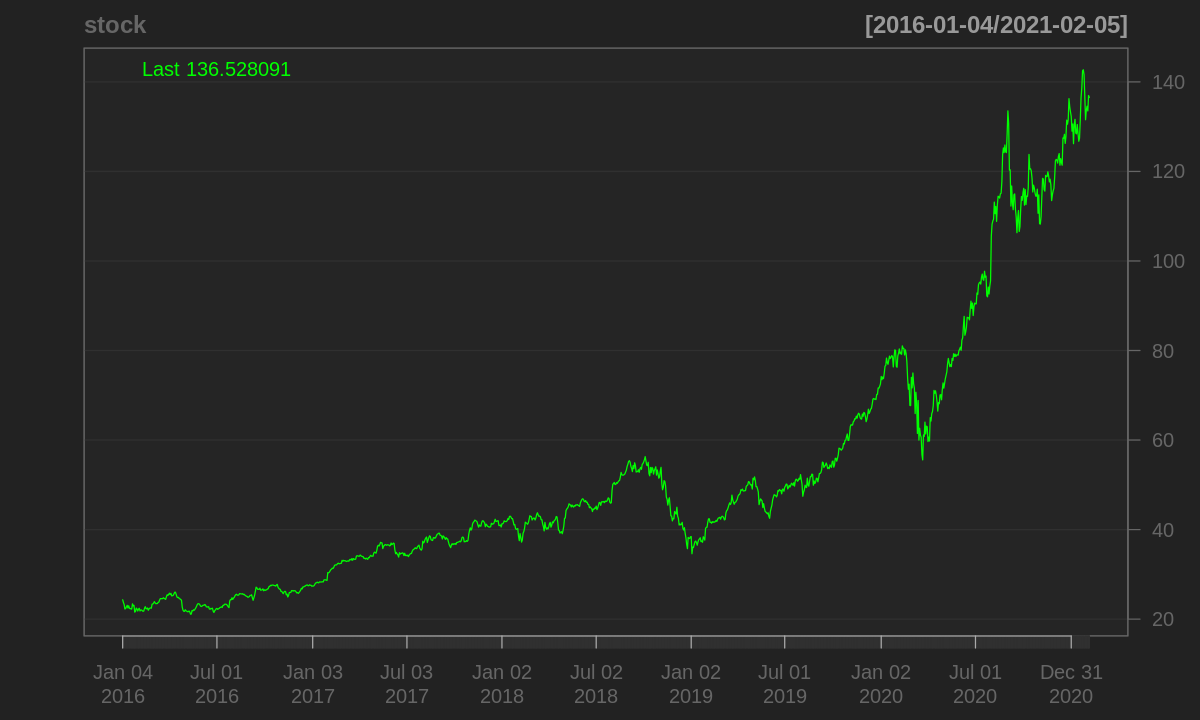

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)

chartSeries(stock)

           AAPL.Adjusted
2016-01-04            NA
2016-01-05   0.025378637
2016-01-06   0.019763726
2016-01-07   0.043121176
2016-01-08  -0.005273835
2016-01-11  -0.016062824

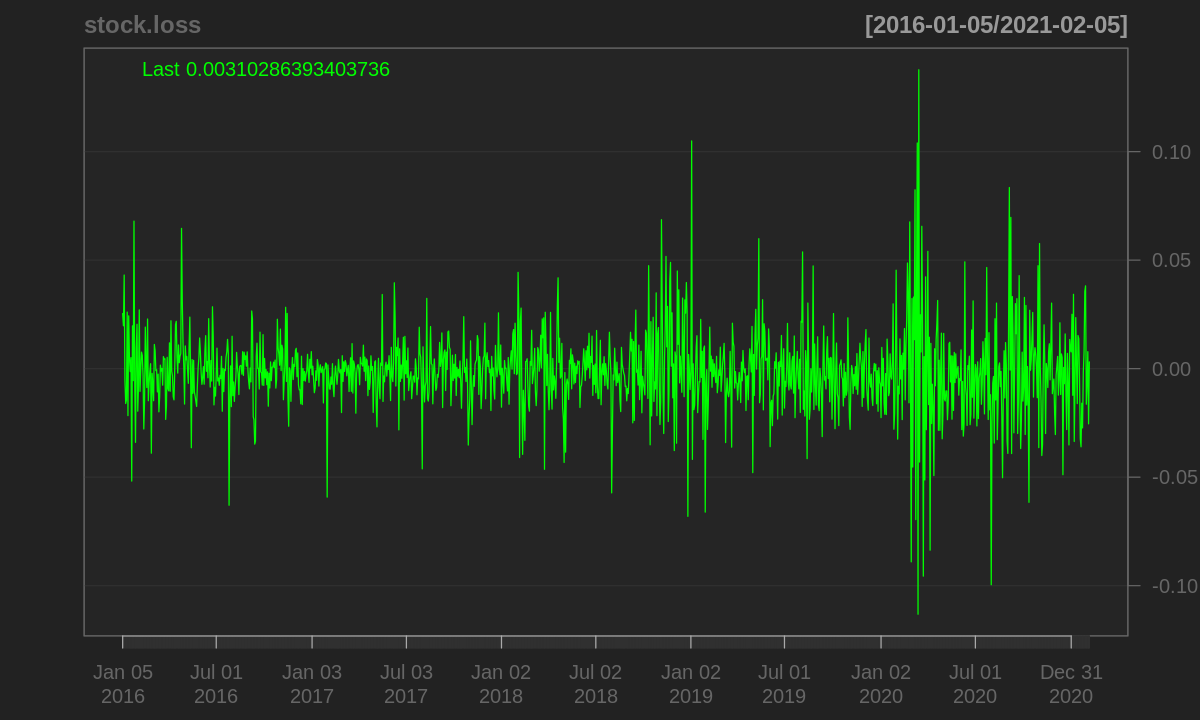

In [ ]:
stock.loss=-diff(log(Ad(`AAPL`))) # Losses are positive for risk managers.
# Remember that a difference in logs: log A - log B = log A/B
# So we're really looking at the percentage change from day to day.
head(stock.loss)
chartSeries(stock.loss)

In [ ]:
n = sum(!is.na(stock.loss))

To compute the VaR, it is sufficient to specify the α level we are interested in, and then use the quantile
function. 

Let’s consider α = 95% and α = 99%.

In [ ]:
# These are empirical quantiles.
VaR95=quantile(stock.loss,0.95,na.rm=T)
VaR95

which(stock.loss >= VaR95)

VaR99=quantile(stock.loss,0.99,na.rm=T)
VaR99 # This says that in only 1 percent of the days should we expect losses of 5.5%.

which(stock.loss >= VaR99)
n
length(which(stock.loss >= VaR99))/n

95% 
0.02787344

[1]    4   17   80   81  121  218  346  362  405  526  530  578  579  699  709
[16]  716  717  722  724  727  728  737  739  744  747  749  756  845  850  903
[31]  910  917 1023 1027 1042 1043 1045 1048 1050 1052 1054 1055 1057 1061 1066
[46] 1069 1082 1118 1129 1147 1160 1177 1179 1181 1185 1187 1190 1197 1199 1215
[61] 1217 1233 1262 1277 1278

99% 
0.05473516

[1]   17   80  716  756  845 1045 1052 1055 1057 1061 1177 1179 1217

[1] 1282

[1] 0.01014041

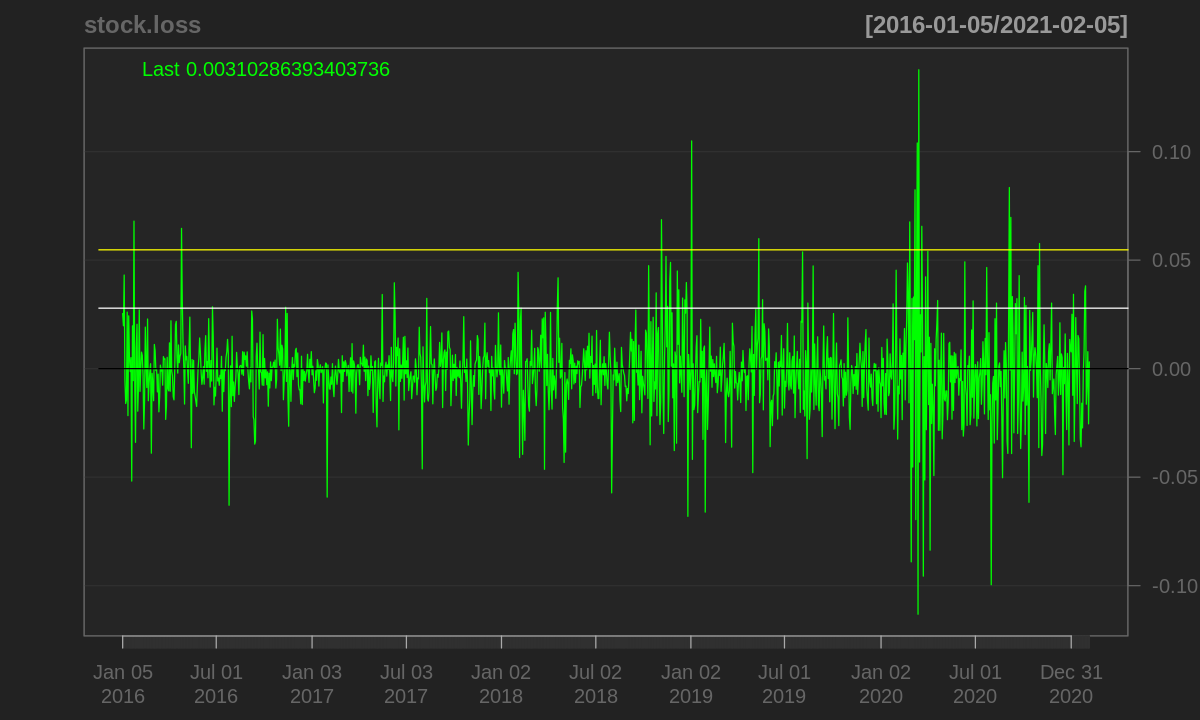

In [ ]:
chartSeries(stock.loss)
abline(h = VaR95, col='white')
abline(h = VaR99, col='yellow')
abline(h=0)

In [ ]:
# EXPECTED SHORTFALL will always be larger than the VaR:

ES95=mean(stock.loss[stock.loss >= VaR95])
ES95
ES99=mean(stock.loss[stock.loss >= VaR99])
ES99

[1] 0.04573237

[1] 0.07954284

In [ ]:
getSymbols("DJIA", from="1990-01-02", to="2021-01-06", src="FRED", auto.assign = getOption('loadSymbols.auto.assign',TRUE))

[1] "DJIA"

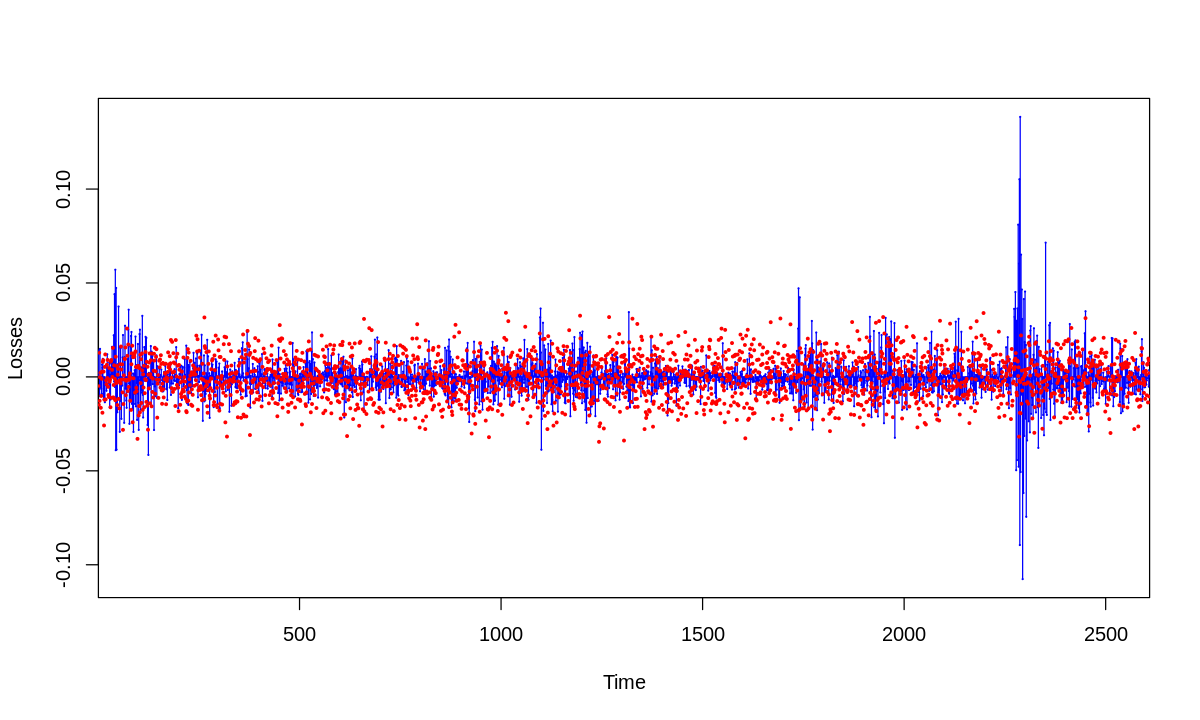

In [ ]:
stock.rtn=diff(log(`DJIA`))
losses <- as.vector(-stock.rtn)
m=mean(losses,na.rm=TRUE) # empirical mean
s=sd(losses,na.rm=TRUE) # empirical sd
times=index(losses)
n = sum(is.na(losses))+sum(!is.na(losses))
# we generate normal observations with mean m and standard deviation s
x=seq(1,n)
y=rnorm(n, m, s)
plot(times,losses,pch=19,xaxs="i",cex=0.03,col="blue", ylab="Losses", xlab="Time", main = '')
segments(x0 = times, x1 = times, y0 = 0, y1 = losses,col="blue")
points(times,y,pch=19,cex=0.3,col="red", ylab="X", xlab="n", main = '')

Difference in estimated shortfall between empirical and normal distribution of losses assumption, which would calculate

$$ES_\alpha = \mu + \sigma \frac{\phi(\Phi^-1(\alpha))}{1-\alpha}$$

In [ ]:
# The true empirical estimated shorfall:

mean(losses[losses>=quantile(losses,0.99,na.rm=T)],na.rm=T)

# And under the normal assumption:

m+s*(dnorm(qnorm(0.99,0,1),0,1))/0.01

[1] 0.05145582

[1] 0.02931306

In [ ]:
# For the VaR:

# Empirical:

quantile(losses,0.99,na.rm=T)

# Under the normal distribution:

qnorm(0.99,m,s)

99% 
0.03191159

[1] 0.02553438

In [ ]:
# Testing the normal assumption, and since the alpha value selected was 0.99, we should expect
# only 0.01 values above the VaR:

round(0.01 * n)

# Under normality, and with the empirical mean and sd calculated from the date, the observed values
# above VaR would be:

(est.hits.under.normal <- length(which(losses>=qnorm(0.99,m,s))))

[1] 26

[1] 42

Since $26<42,$ we are possibly underestimating Value-at-Risk, under normality. Let’s set a
significance level of $5\%$ (or $10\%$ or $1\%,$ you choose). Then our right-tail binomial test is

In [ ]:
# So under the assumption of normality, there are way too many asymptotic events:

1-pbinom(est.hits.under.normal - 1,n,0.01) # The -1 is because we want the probability of that value in est.hits.under.normal or more.

# Or

binom.test(length(which(losses>=qnorm(0.99,m,s))), n, 0.01, alternative = "greater")

[1] 0.002388324


	Exact binomial test

data:  length(which(losses >= qnorm(0.99, m, s))) and n
number of successes = 42, number of trials = 2609, p-value = 0.002388
alternative hypothesis: true probability of success is greater than 0.01
95 percent confidence interval:
 0.0122629 1.0000000
sample estimates:
probability of success 
            0.01609812 


### EVT:

Within EVT, the role of the Gaussian is played by two distributions:

![](https://user-images.githubusercontent.com/9312897/120955835-48d91800-c720-11eb-8164-d065efb0940b.png)

The **Block Maxima approach** method (Fisher-Tippet theorem) leads to the Generalized Value Distribution:

The result of the block maxima approach. We model normalized maxima.

$$F(x;\mu.\sigma;\xi)=e^{-(1+\xi \frac{x-\mu}\sigma)^{-1/\xi}}\tag 1$$

There are three extreme value distributions that can be represented using the generalized extreme value distribution family. Defining

$$G_\xi(x)=\begin{cases}e^{-(1+\xi x)^{-1/\xi}},&& \xi\neq0\\e^{-e^{-x}}, && \xi=0\end{cases}$$

where $1+\xi x>0.$

$$\begin{align}
\xi =\alpha^{-1} > 0,\quad &\text{Fréchet case (fat tailed) }\Phi_\alpha\\
\xi =-\alpha^{-1} < 0,\quad &\text{Weilbull case (finite upper bound } \Psi_\alpha\\
\xi =0, \quad &\text{Gumbel case (thin tailed) }\Lambda
\end{align}$$



---

The **Peak-Over-threshold** approach (Pikands-Balkema-de Haan theorem) is linked to the Generalized Pareto Distribution:

$$G_\xi(x)=\begin{cases}1-(1+\xi x)^{-1/\xi},&& \xi\neq0\\1-e^{-\frac{x-\mu}{\sigma}}, && \xi=0\end{cases}$$

GENERALIZED EXTREME VALUE DISTRIBUTION:

We want a sort of CLT for the maxima, or normalized maxima through two values: a sort of mean $b_n,$ and the equivalent of the standard deviation, $a_n>0,$ such that 

$$\max(X_1,X_2,\cdots,X_n) = a_nX + b_n$$

which would be called a max-stable distribution. What it says is that distribution of the maximum is a re-scaling of the starting distribution (closure under maximization).

This is achieved with the Fisher-Tippet theorem (leads to the generalized extreme value distribution or GEV), and the Pikands-Balkema-de Haan theorem (corresponding to the generalized Pareto distribution).

Fisher-Tippet theorem:

> Let $X_1,X_2,\dots, X_n$ be iid rvs. If there exist constants $a_n > 0$ and $b_n\in \mathbb R,$ and some distribution $G,$ such that

$$\frac{M_n - b_n}{a_n}\to G,$$

Then $G$ belongs to one of the three extreme value distribution types:

1. Fréchet: $$\Phi_\alpha(x)=\begin{cases}0,&& x\leq 0\\e^{-x^{-\alpha}},&& x>0\end{cases}$$
2. Weilbull $$\Psi_\alpha(x)=\begin{cases}e^{-x^\alpha}&& x\leq 0\\1,&& x>0\end{cases}$$
3. Gumbel $$\Lambda(x)=e^{-e^{-x}}$$

The result of the block maxima approach. We model normalized maxima.

$$F(x;\mu.\sigma;\xi)=e^{-(1+\xi \frac{x-\mu}\sigma)^{-1/\xi}}\tag 1$$

There are three extreme value distributions can be represented using the generalized extreme value distribution family. Defining

$$G_\xi(x)=\begin{cases}e^{-(1+\xi x)^{-1/\xi}},&& \xi\neq0\\e^{-e^{-x}}, && \xi=0\end{cases}$$

where $1+\xi x>0.$

$$\begin{align}
\xi =\alpha^{-1} > 0,\quad &\text{Fréchet case (fat tailed) }\Phi_\alpha\\
\xi =-\alpha^{-1} < 0,\quad &\text{Weilbull case (finite upper bound } \Psi_\alpha\\
\xi =0, \quad &\text{Gumbel case (thin tailed) }\Lambda
\end{align}$$

The log-normal is in the Gumbel class, but it may not be thin tailed.

---

The tail of a Fréchet decays as a power law:

$$1- \Phi_\alpha(x) = 1 -e^{-x^{-\alpha}}\sim x^{-\alpha}, \; x \to \infty$$



Proof:

By definition, $f$ and $g$ are *asymptotically equal* (as $x$ approaches infinity), denoted by 

$$ f(x) \sim g (x) \; \; (x\rightarrow \infty),$$ if

$$\lim_{x\rightarrow \infty} \frac{f(x)}{g(x)} = 1. $$

In our case,  we have ($\alpha >0$)

$$\lim_{x\rightarrow \infty} \frac{1-e^{-\color{red}{x^{-\alpha}}}}{x^{-\alpha}} \quad \overset{y \,=\, \color{red}{x^{-\alpha}}}{=}\quad\lim_{y\rightarrow 0} \frac{1-e^{-y}}{y} \quad \stackrel{\text{L'Hospital}}{=}\quad \lim_{y\rightarrow 0} \frac{e^{-y}}{1} = 1 $$

---


In [here](https://www.eurandom.tue.nl/reports/1999/013-report.pdf) the [regularly varying function](https://en.wikipedia.org/wiki/Slowly_varying_function) nature of the Fréchet survival function is explained. Of note the definition of regularly varying function is a function such that

$$\lim_{x\to \infty}\frac{f(tx)}{f(x)}=t^\alpha$$

and if $\alpha=0,$ it is called slowly varying. Since $t^0=1,$ this coincides with the [definition in Wikipedia][2] of slowly varying functions: a [slowly varying function][3] in which the relative differences in the tail is equal to zero: $$\lim_{x\to \infty} \frac{f(tx) - f(x)}{f(x)}=0.$$

The proof for the survival function of the Fréchet is:

$$ \lim_{x\rightarrow \infty} \frac{1- e^{-(tx)^{-\alpha}}}{1-e^{-x^{-\alpha}}} 
= \lim_{y\rightarrow 0} \frac{1- e^{-t^{-\alpha}y}}{1-e^{-y}} = \lim_{y\rightarrow 0} \frac{t^{-\alpha}e^{-t^{-\alpha}y}}{e^{-y}} = t^{-\alpha} $$

---

Take heed of what happens with the moments of a Fréchet, for instance the variance:

$$\int_0^\infty x^2  \frac{\mathrm d}{dx}\Phi=\int_0^\infty x^2  \left(\alpha x^{-1-\alpha }e^{-x^{-\alpha}}\right)\mathrm dx=\int_0^\infty x^{1-\alpha}  \alpha e^{-x^{-\alpha}}\mathrm dx$$

if $\alpha>2,$


$$\int_0^\infty 2.01 x^{1-2.01}   e^{-x^{-2.01}}\mathrm dx\sim 200$$

but if $\alpha=2$ it does not converge!

Likewise, if the parameter alpha is less than $1$ the mean is not even defined!


---

GENERALIZED PARETO DISTRIBUTION:

The result of the peak-over-threshold approach.

$$G(x;\mu.\sigma;\xi)=\begin{cases}1-\left( 1+\xi \frac{x-\mu}\sigma\right)^{-1/\xi},\; \xi\neq 0\\
1-e^{-\frac{x-\mu}{\sigma}},\; \xi=0\end{cases}$$

The excess distribution of a rv $X$ over a threshold $u$ is defined as

$$F_u(x)=\Pr(X-u\leq x \mid X>u)= \frac{F(x+u)-F(u)}{1-F(u)}$$

The probability that our random variable, re-scaled by the threshold $u$, is smaller than $x,$ given that $X>u.$

The Pickands-Balkema-De Haan theorem states that if our distribution belongs to one of the maximum domain of attraction (MDA) of the three extreme value distributions, i.e. Fréchet, Weilbul or Gumble, we can always find a threshold $u,$ such that if it is large enough the excess distribution can be well approximated by a generatlized Pareto:

If

$F∈MDA(G_ξ),$

$$\lim_{u→x}\sup_{0≤x≤x_{F−u}}|F_u(x)−G(x;σ(u),ξ)|=0$$

The PBdH theorem tells us that:

1. A large number of tails are well approximated by the generalized Pareto.
2. In the peak-over-threshold method the excesses can be modelled by the GPD.
3. The number of exceedances follow a homogeneous Poisson process.
4. The distribution of the maximum of a Poisson number of iid excesses is GEV.

### EVT in practice:

EVT from [here](https://www.youtube.com/watch?v=eUWlzAQfgFw&t=472s):

In [ ]:
install.packages('evir')
library('evir')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 num [1:2167] 1.68 2.09 1.73 1.78 4.61 ...
 - attr(*, "times")= POSIXt[1:2167], format: "1980-01-03" "1980-01-04" ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.321   1.778   3.385   2.967 263.250 

[1] 8.507452

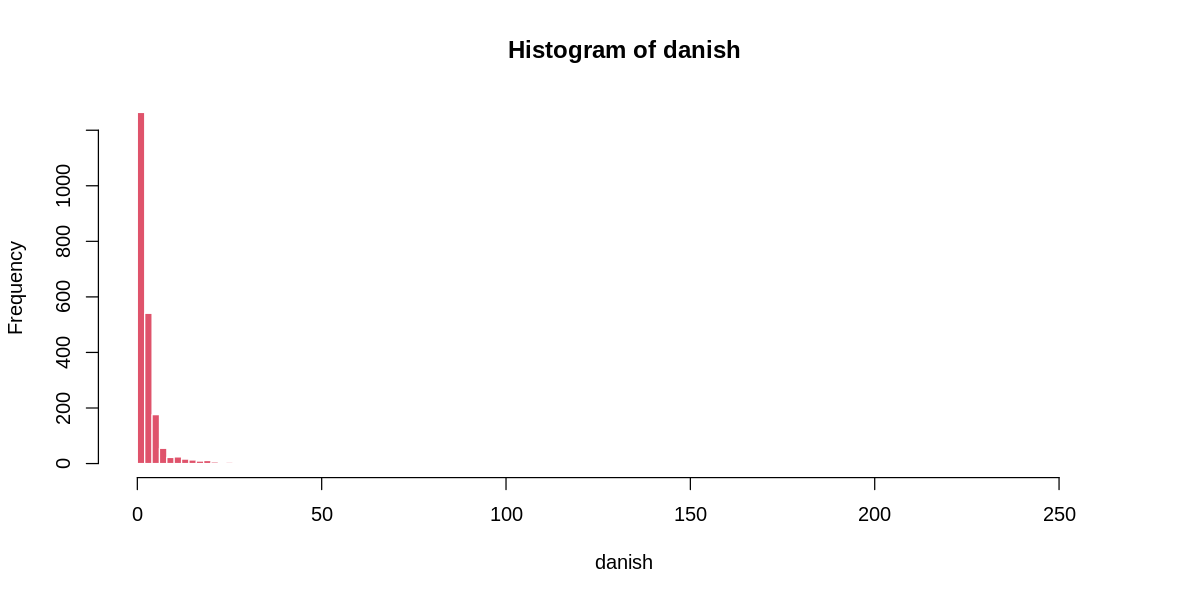

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

data(danish)

hist(danish, border=F, breaks=100, col=2)
str(danish)
summary(danish)
sd(danish)

The data comes from fire insurance claims. The quartiles show asymmetry in the data. The mean is $3.4$ whereas the median is far less, $1.8,$ signaling skewness to the right (positively skewed). The SD of $8.5$ is higher than the mean and the median, suggesting large variability.

With a simple exponential Q-Q plot we can see if heavy tails are present. In regression OLS the Q-Q plot is used to verify that the residuals are normally distributed, but in extreme value theory it is used to verify the presence of exponentiality (Gumbel case): the exponential distribution is the benchmark to differentiate heavy versus light tails.

So we compare our data quantiles to the quantiles of a theoretical exponential distribution in the `qplot()`.

Here is the comparison between random data from the Gaussian and exponential to the danish:

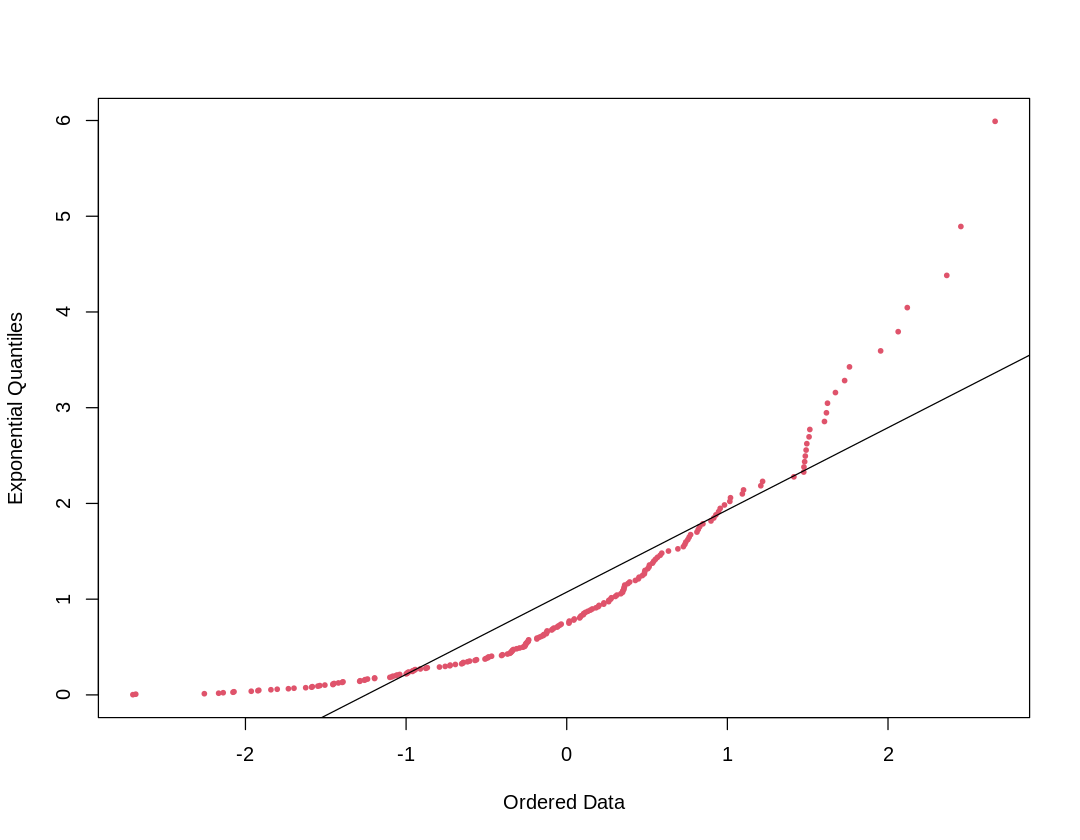

In [ ]:
set.seed(2021)
options(repr.plot.width=9, repr.plot.height=7)

s = rnorm(200)
qplot(s, xi=0, pch=19,col=2, cex=.5)

The convexity of the plot (looking from below at the graph) suggests tails lighter than the exponential, which is the case in the normal:

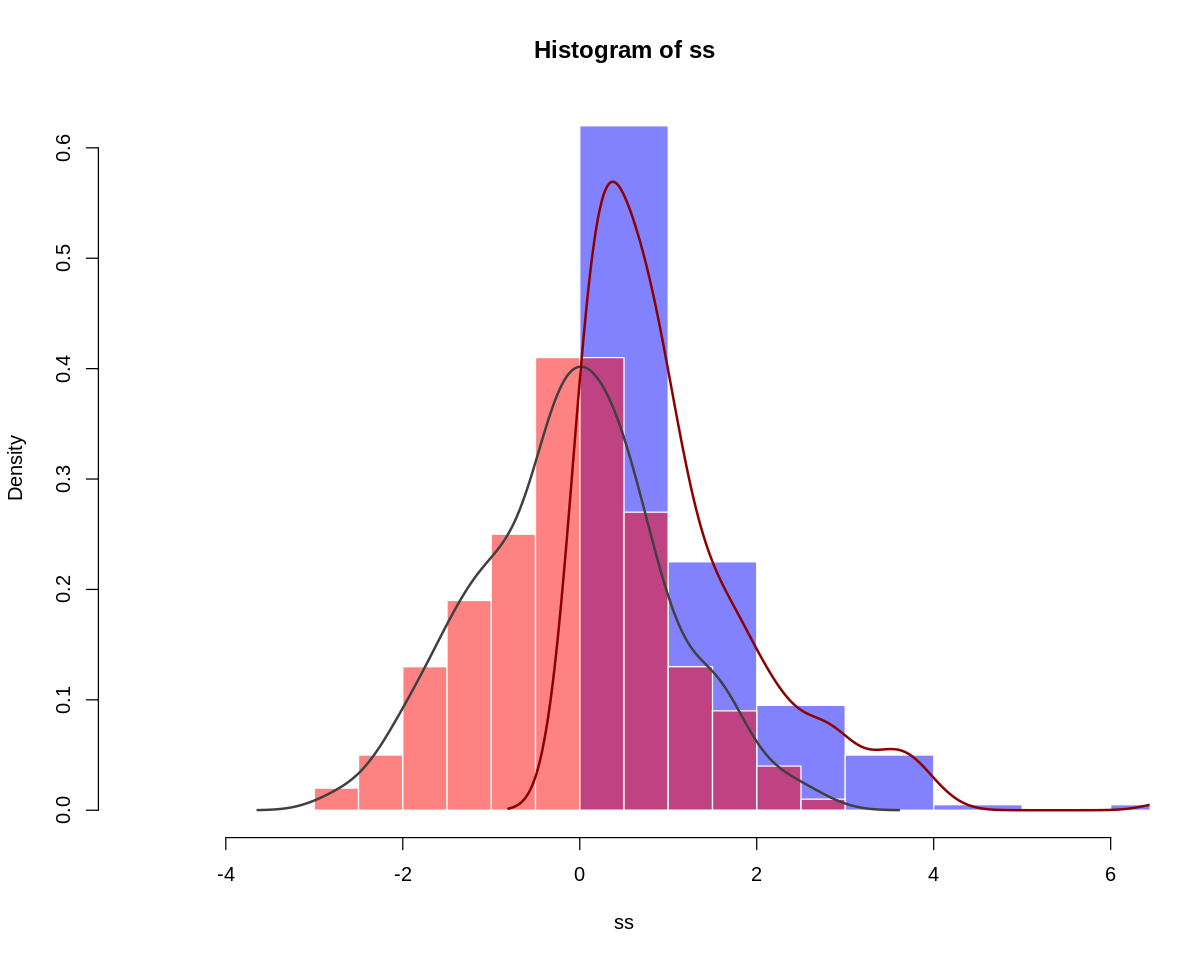

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)

ss = rexp(200)

hist(ss, prob=T, col=rgb(0, 0, 255, max = 255, alpha = 125), xlim=c(-5,6), border=F)
hist(s,prob=T, add=T, border=F, col=rgb(255, 0, 0, max = 255, alpha = 125))

lines(density(s), col="gray25", lwd=2)
lines(density(ss), col="red4", lwd=2)

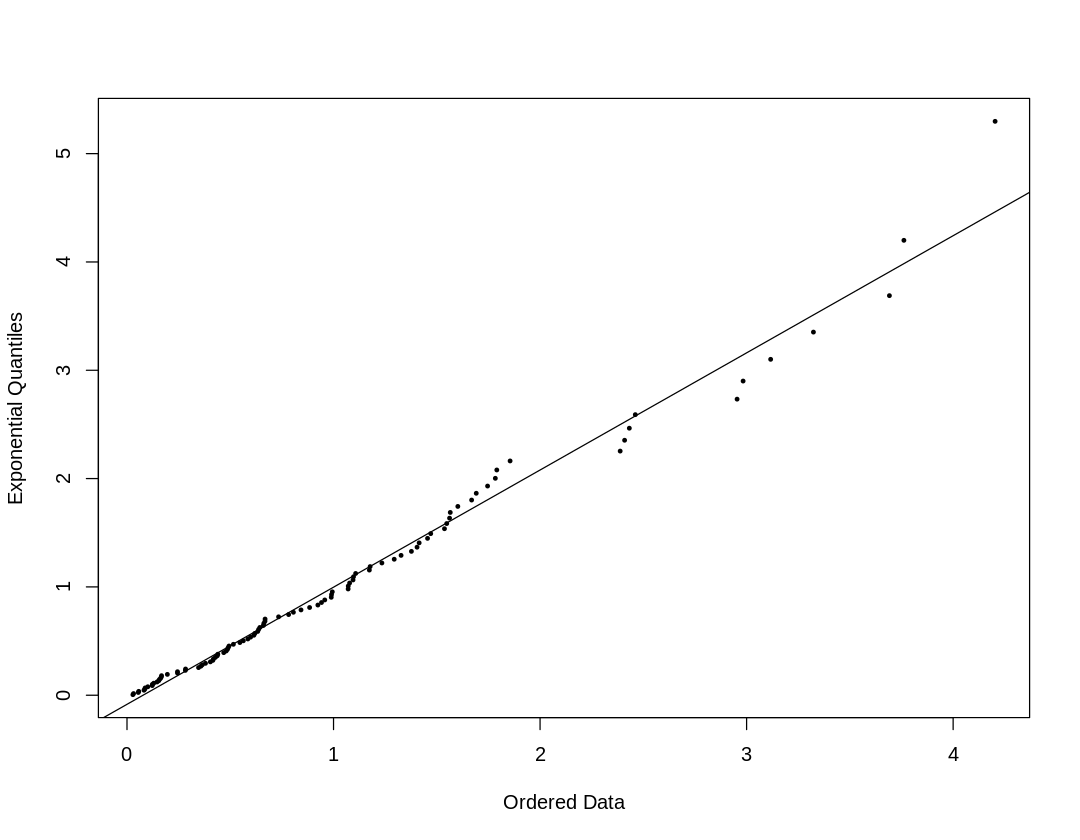

In [ ]:
options(repr.plot.width=9, repr.plot.height=7)
qplot(rexp(100), xi=0, pch=19, cex=.4)

Here there is a perfect linear fit with the exponential, as expected.

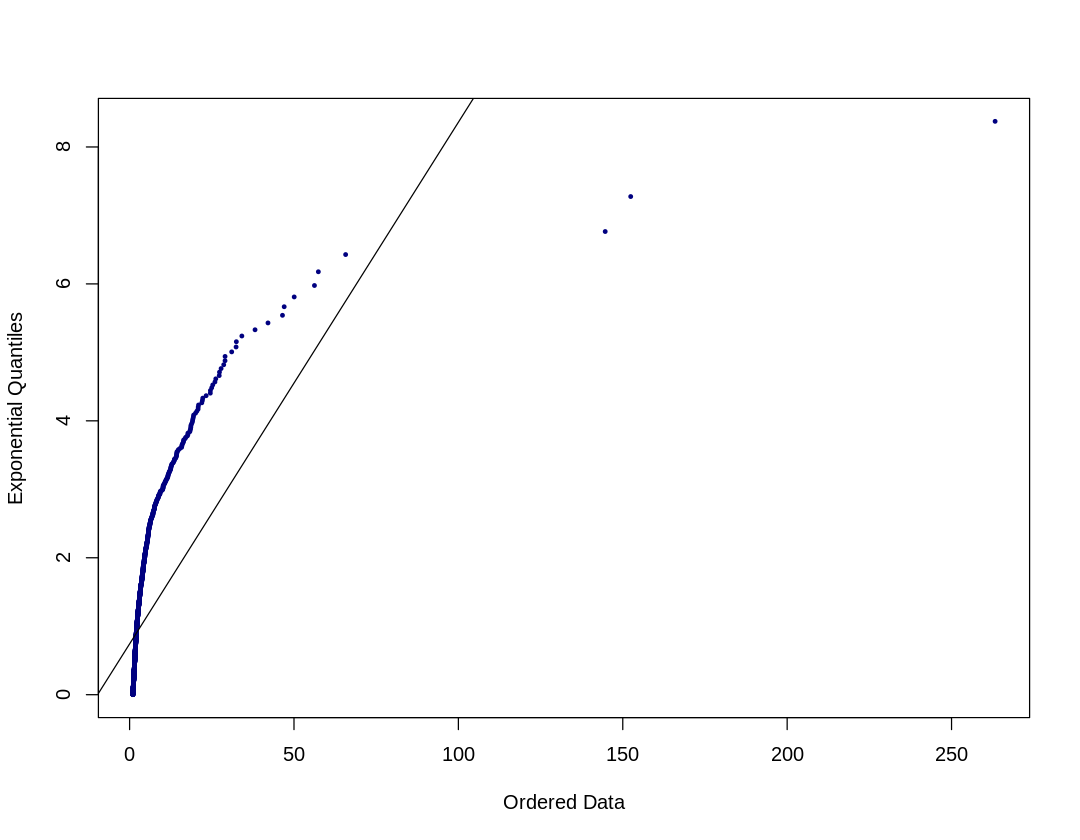

In [ ]:
options(repr.plot.width=9, repr.plot.height=7)
qplot(danish, xi=0, pch=19, cex=.4, col='navyblue')

The extreme concavity (looking from below) of the plot is a strong signal of heavy tails.

Now trying it for the DJIA:

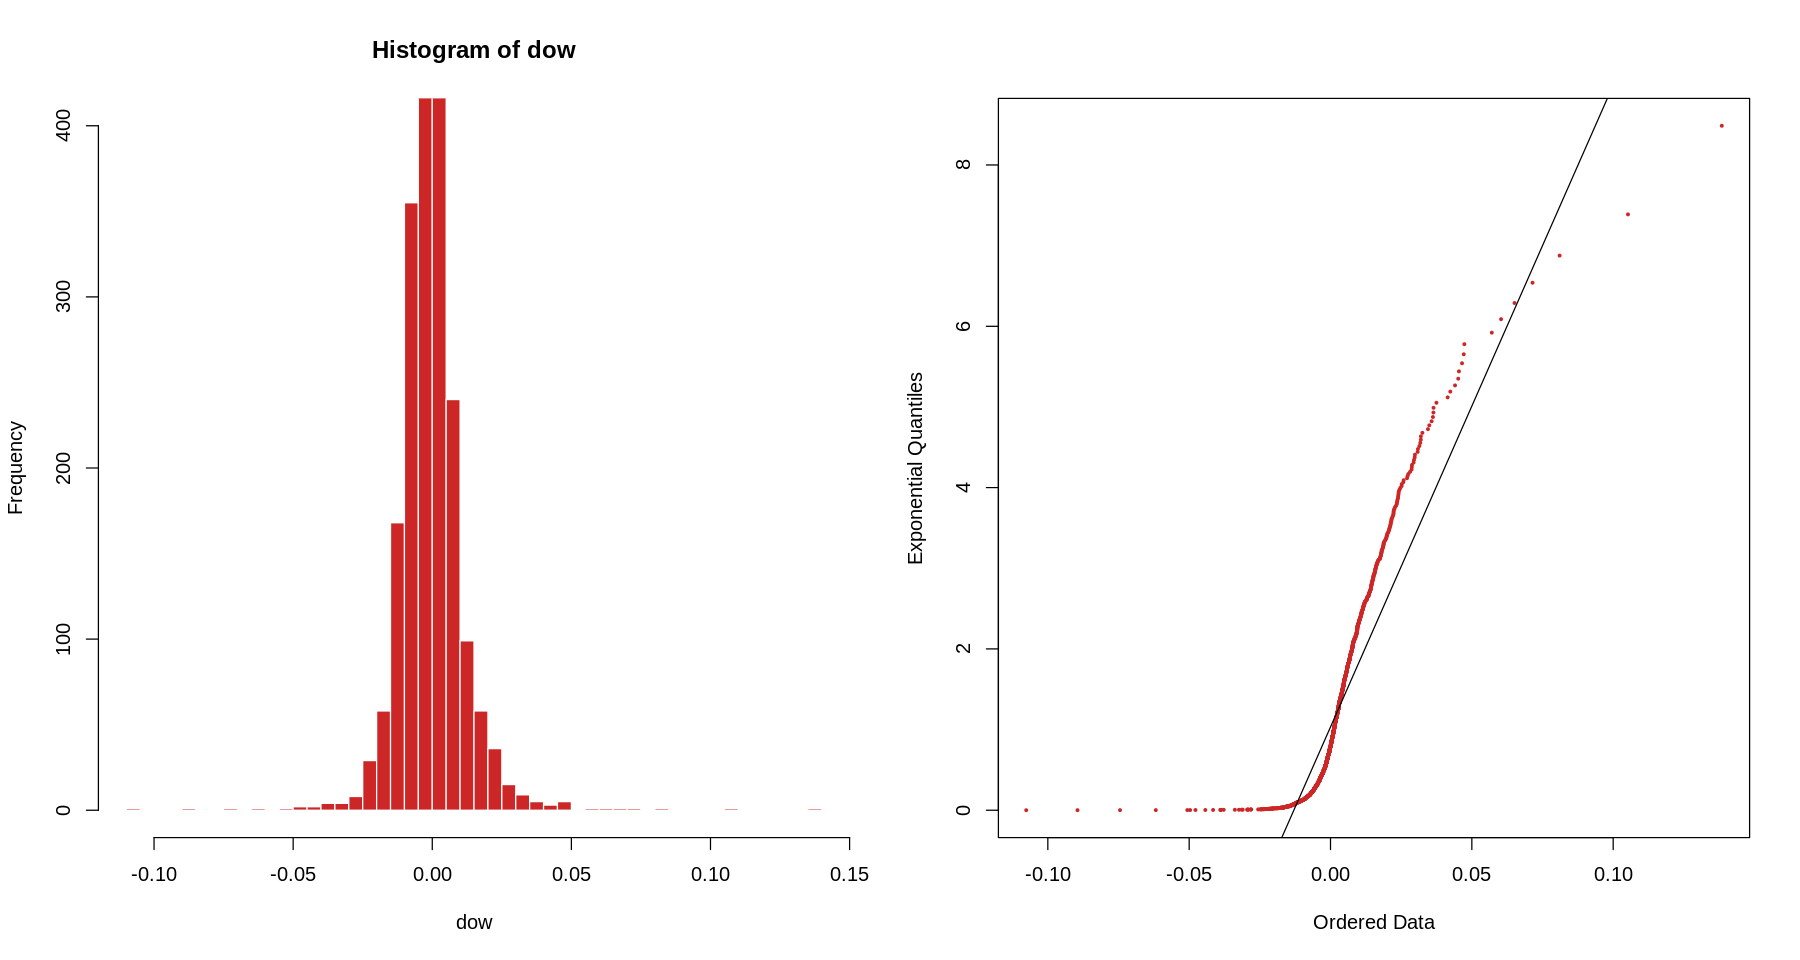

In [ ]:
dow <- na.omit(losses)

options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))

hist(dow, border=F, col='firebrick3', breaks=60, ylim=c(0,400))
qplot(dow, xi=0, pch=19, col='firebrick3', cex=.3)

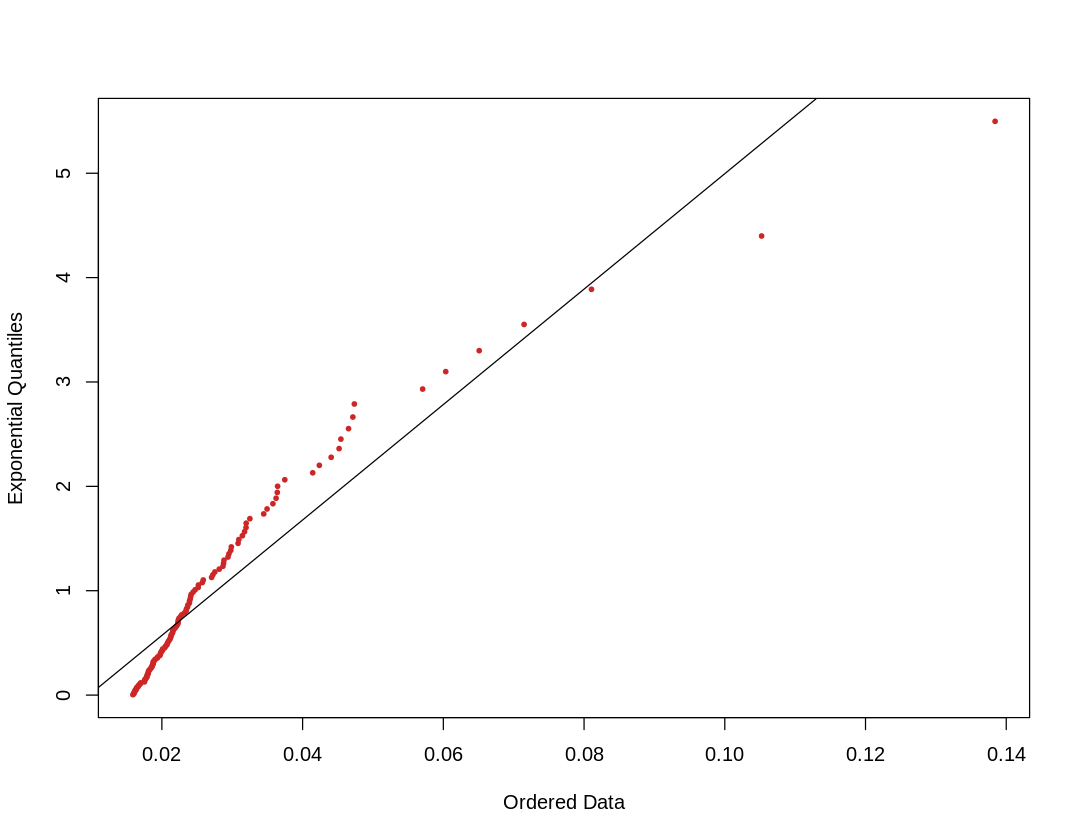

In [ ]:
# What if there are mixed distributions... Let's explore just the top 5-th quantile:
options(repr.plot.width=9, repr.plot.height=7)
dow.top <- dow[dow>=quantile(dow, 0.95)]
qplot(dow.top, xi=0, pch=19, col='firebrick3', cex=.5)

Now, the Zipf plot will give us information on the survival function. 

A linear plot will suggest that the data is distributed like a Pareto, i.e. fat tails, not just heavy tails.

It detects power-law decay at the tail. It is a necessary condition, but not sufficient. If there is no linearity, we rule out fat tails, but the lognorm distribution can look very similar to the linear plot of a Pareto.

The Zipf plot is a log-log plot of the empirical survival function of our data.

It comes from the observation that in a Pareto

$\bar F(x) = \left(\frac{x}{x_0} \right)^{-\alpha},\quad 0<x_0\leq x \implies \log(\bar F(x))= \alpha \log(x_0) - \alpha \log(x).$

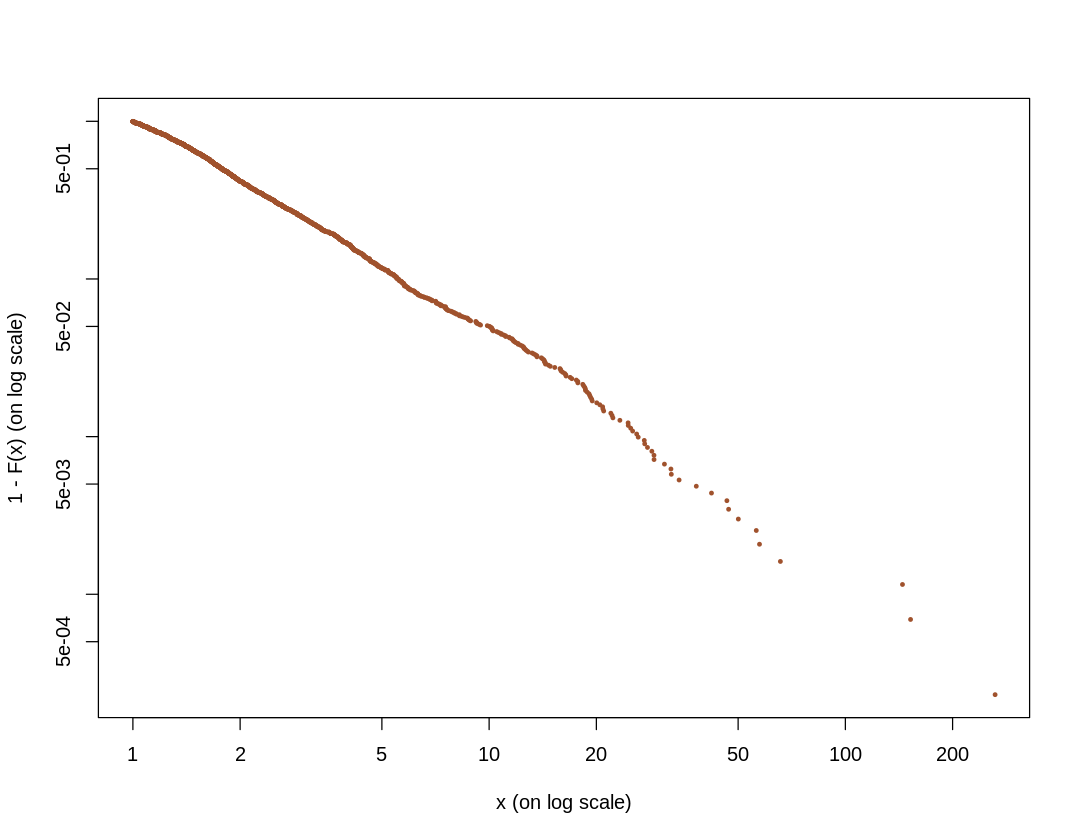

In [ ]:
# Here is the Zipf plot of the log of the data (x) and the empirical survival (y)
options(repr.plot.width=9, repr.plot.height=7)
emplot(danish, 'xy', pch=19, col='sienna', cex=.4)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1324 x values <= 0 omitted from logarithmic plot”


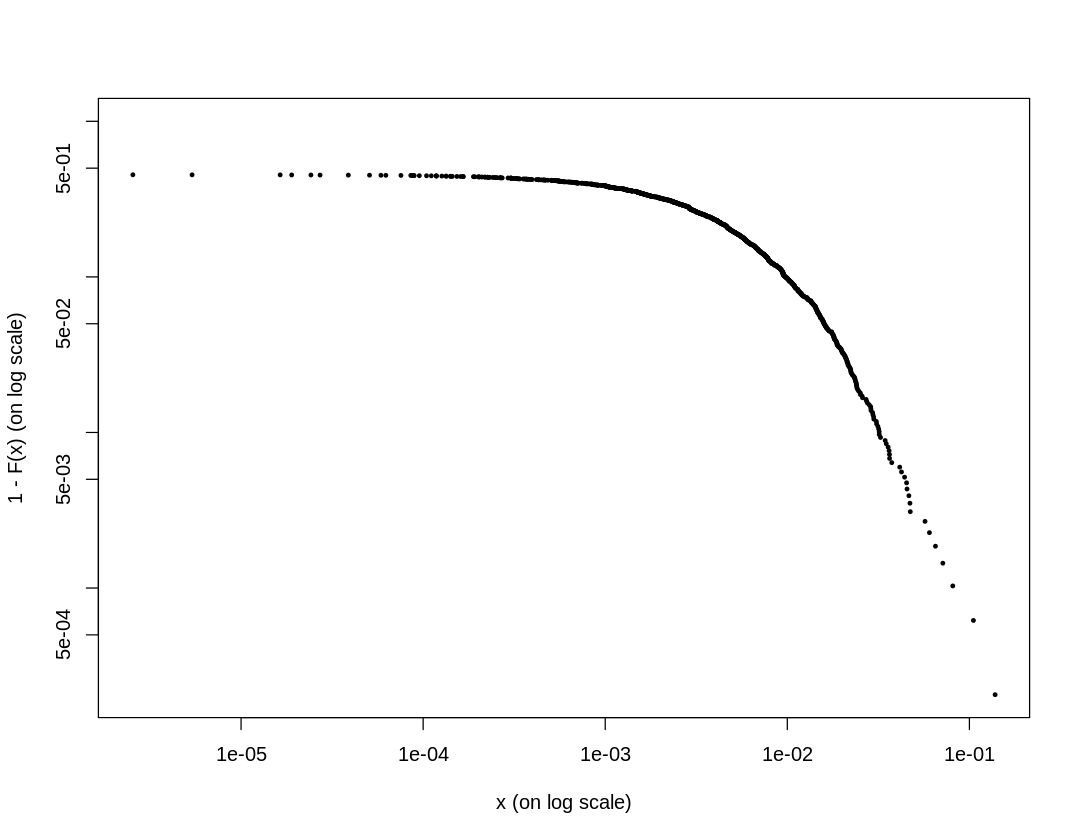

In [ ]:
emplot(dow, 'xy', pch=19, cex=.4)

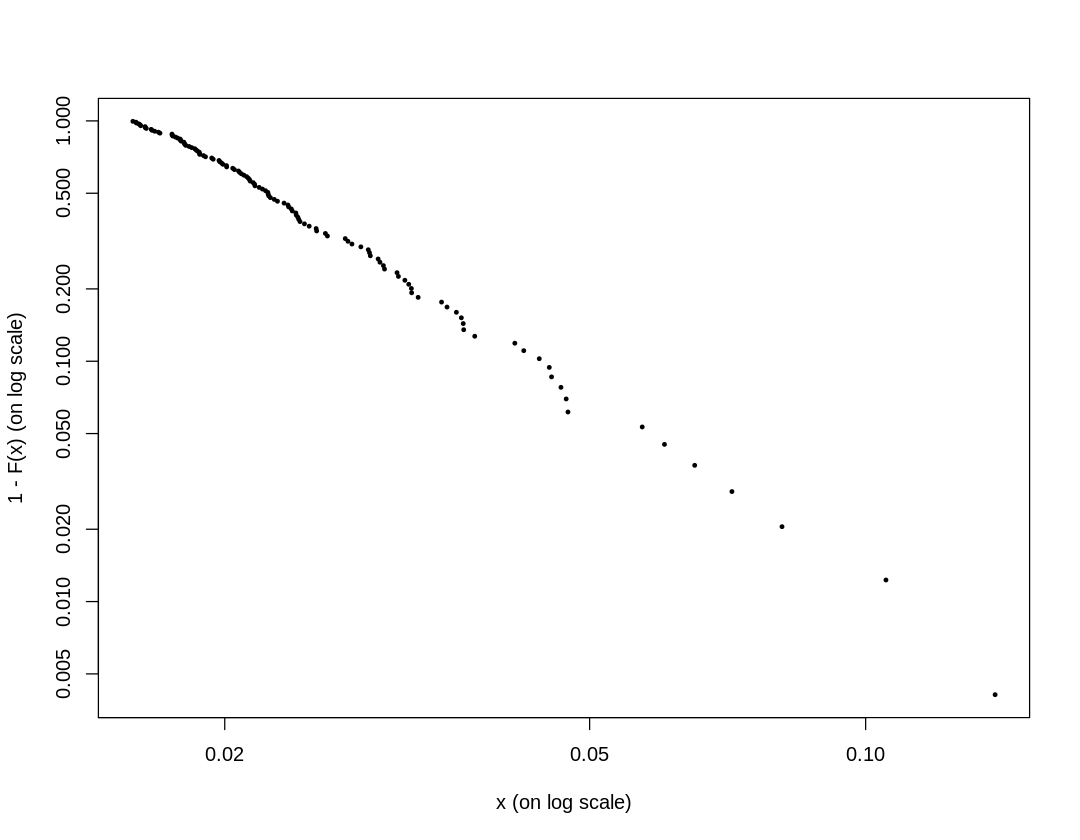

In [ ]:
options(repr.plot.width=9, repr.plot.height=7)
emplot(dow.top,'xy',pch=19, cex=.4)

But the Zipf plot is not enough.

The MEF (Mean Excess Function) of a rv $X$ with a cdf $F$ is

$$e(v) = E[X-v \mid X>v]=\frac{\int_v^\infty (t-v) dF(t)}{\int_v^\infty dF(t)}$$

So it is the expected value of the all the observations above a threshold $v$ rescaled by the threshold.

Note that there has to be a finite mean (expectation), which only happens when the alpha value of the Pareto is above 1.

The Meplot will yield a plot consistent with the Wijk's law (the mean excess function of a Pareto grows linearly with the threshold). Another signal of fat tails.



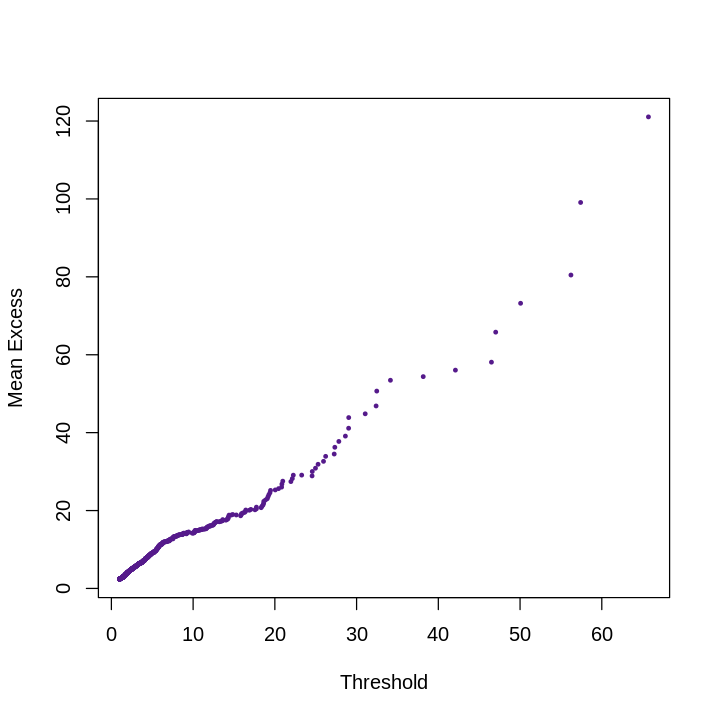

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)

meplot(danish, pch=19, col='purple4', cex=.4)

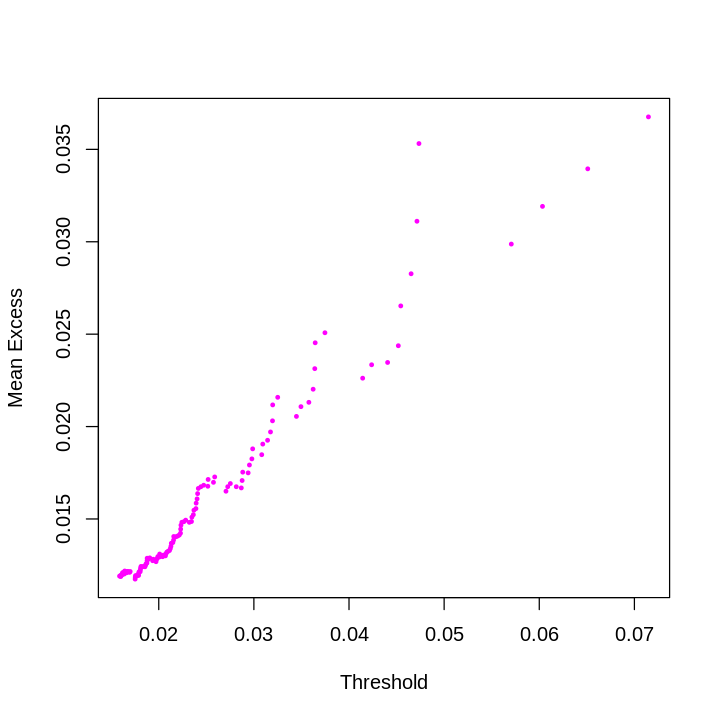

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
meplot(dow.top, pch=19, col='magenta', cex=.4)

Next, the concentration profile (CP):

In [ ]:
install.packages('ineq')
library('ineq')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



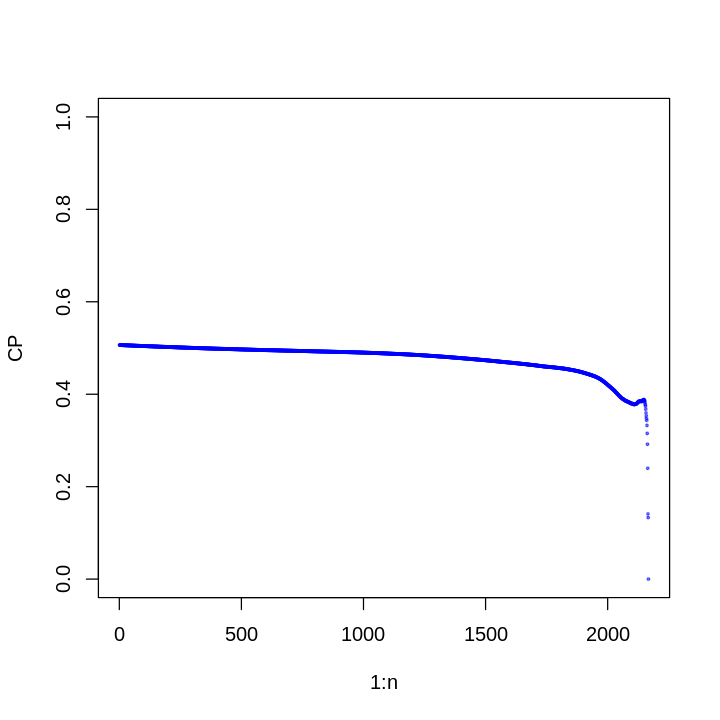

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
sort_danish = sort(danish)
n=length(danish)
CP=c()
for (i in 1:n) CP[i]=ineq(sort_danish[i:n], type='Gini')

plot(1:n,CP,ylim=c(0,1),pch=19, cex=.3, col=rgb(0, 0, 100, max = 100, alpha = 50))

This constant concentration profile (except at the margin) is typical of Pareto distributions.

To analyze the moments we can use the function MS.

The ratio of maximum-to-sum for a particular moment $k$ will converge a.s. to $0$ if the moement is finite:

For an iid sequence $X_1,\dots,X_n$

$$S_n(k)=\sum_1^n \vert X_i \vert^k$$

$$M_n(k) =\max_{i\in\{1,\dots, n\}}(\vert X_i \vert^k)$$

will result in

$$R_n(k)=\frac{M_n(k)}{S_n(k)}$$

by the LLN, $R_n(k) \to 0$ if $\mathbb E(X^k)<\infty.$

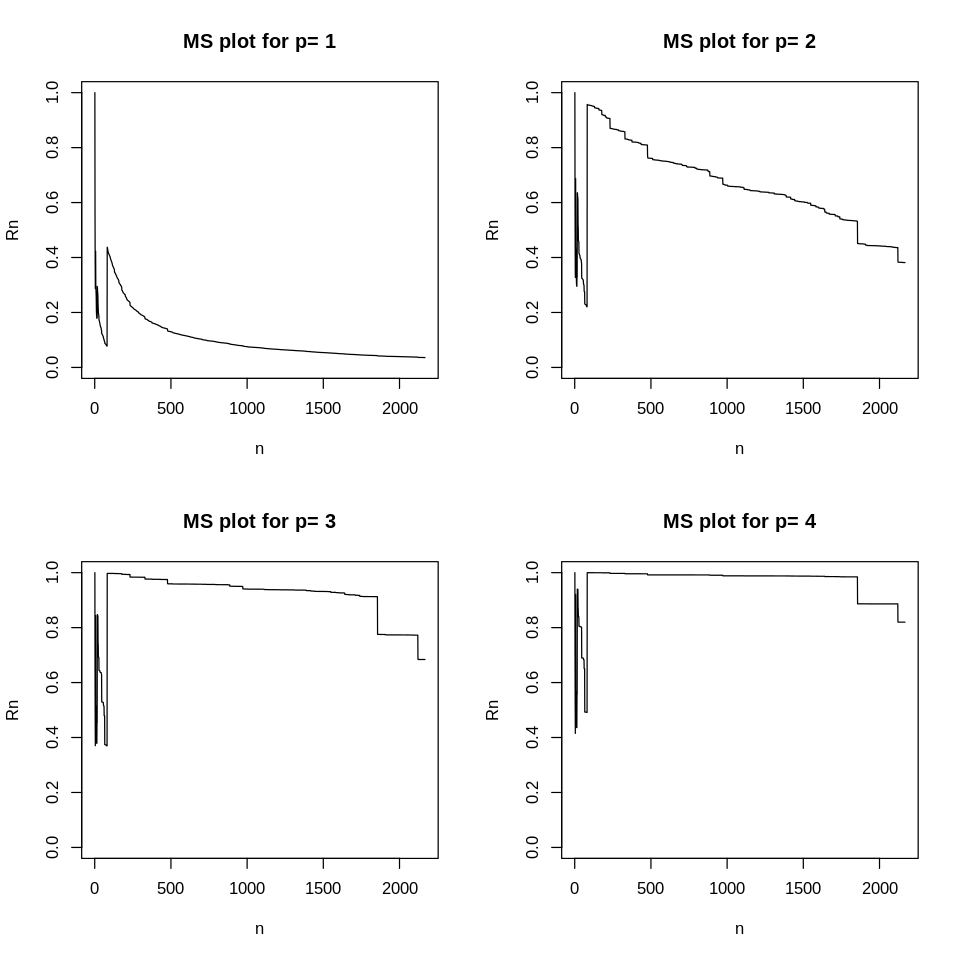

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
MSplot <- function(data, p=4){
  par(mfrow=c(2,2))
  x=abs(data)
  for(i in 1:p){
    y=x^i
    S=cumsum(y)
    M=cummax(y)
    R=M/S
    plot(1:length(x),R,type='l',ylim=c(0,1), xlab='n',ylab='Rn',main=paste('MS plot for p=',i))
  }
  par(mfrow=c(1,1))
}
MSplot(danish)

This shows convergence only for the first of the 4 first moments. This suggests a fat tailed distribution. This means, for instance, that the SD calculated above is useless for inference.

The Hill plot will confirm this, expecting an alpha between 1 and 2, or a $\xi$ ($1/\alpha$) smaller than 1 but bigger than 0.5.

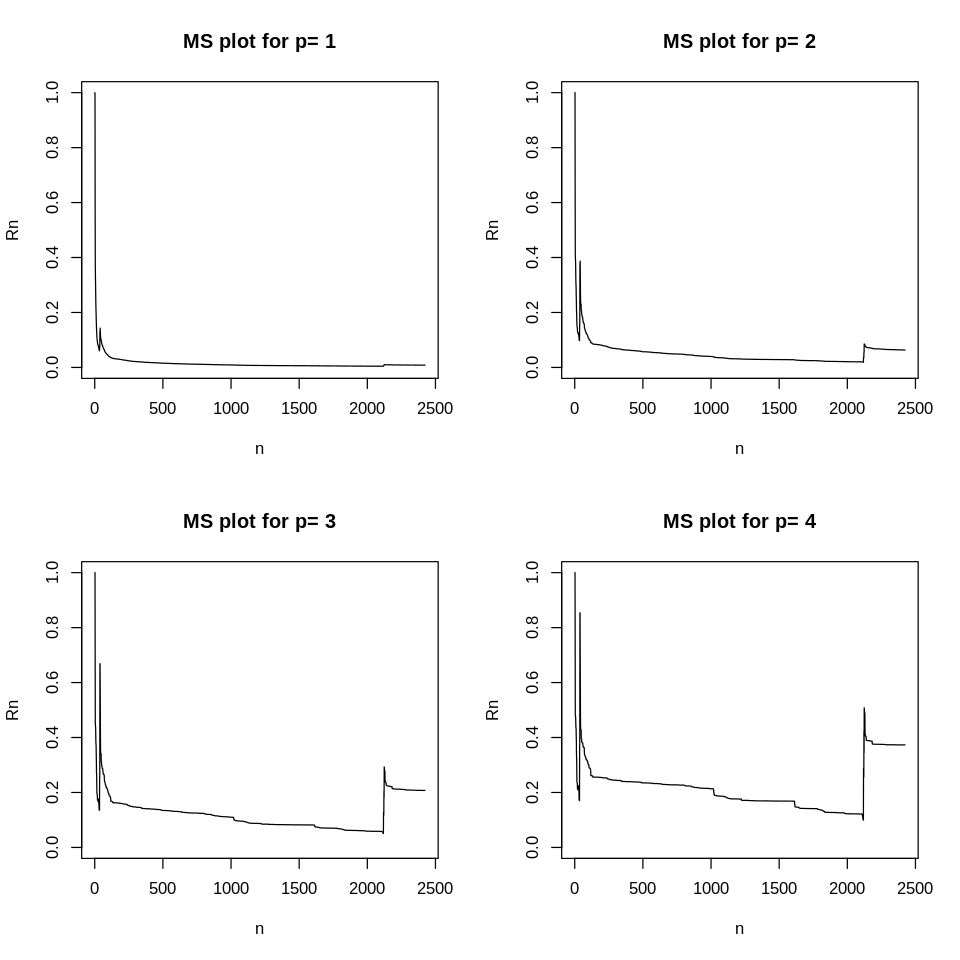

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
MSplot(dow)

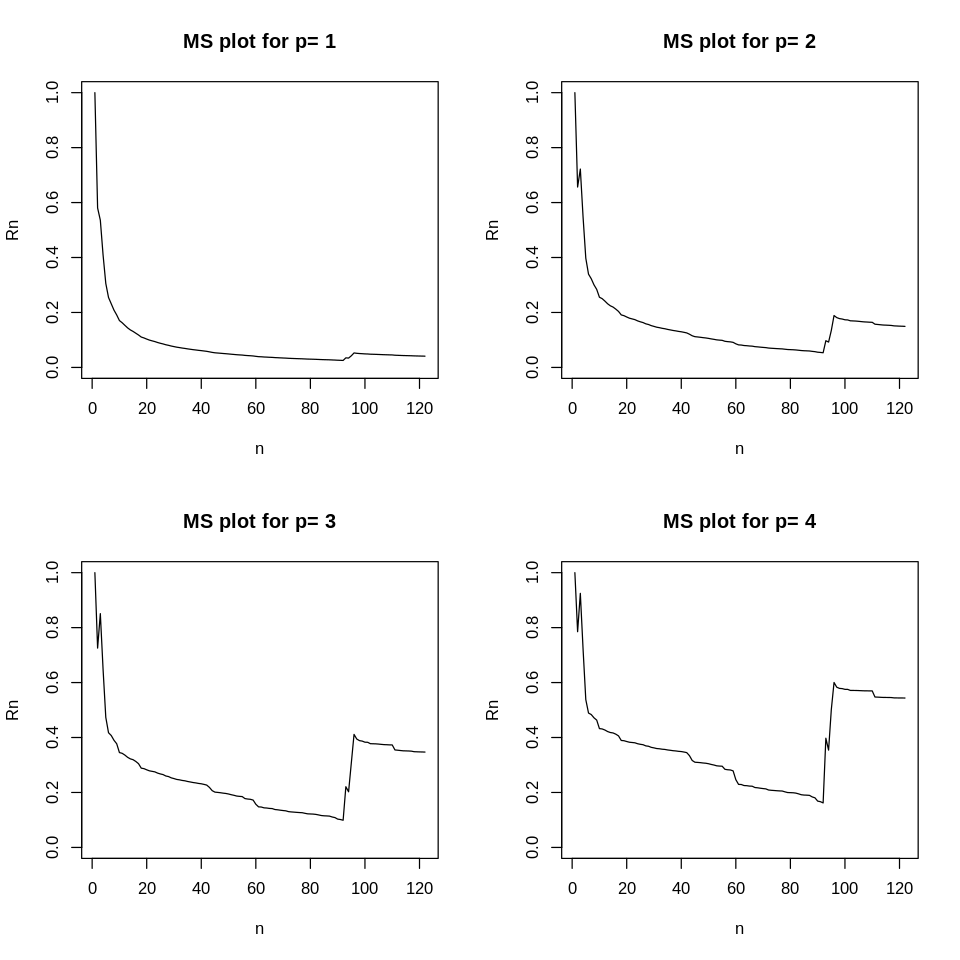

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
MSplot(dow.top)

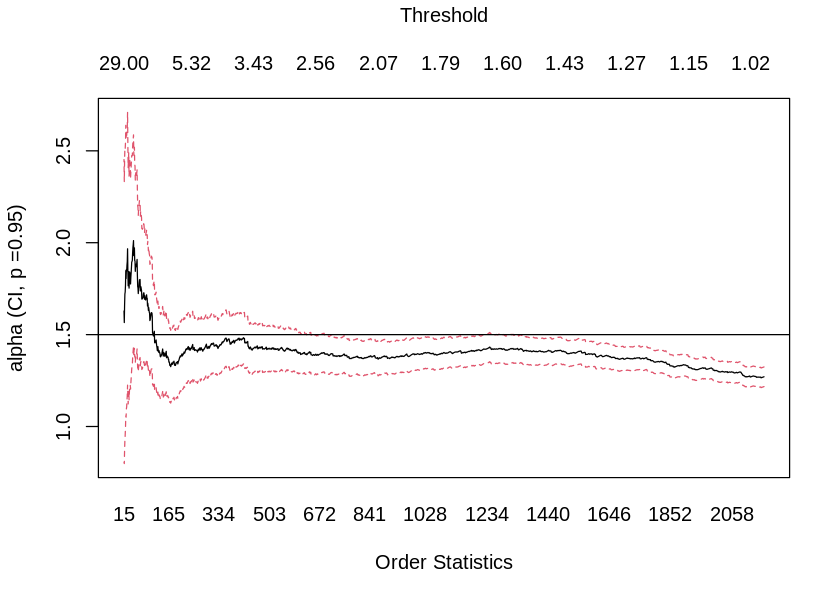

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
hill(danish)
abline(h=1.5) # The alpha parameter is around 1.5
# The stability starts at a threshold of 5.5 (Look at the top).

The $\xi=1/\alpha$ or $1/1.5 = 0.6$

A value of alpha around 1.5 is highly plausible looking at the plot. The stability
seems to kick in around a threshold of $5.5$ (look at the numbers on top). In terms if $\xi$ we expect about $1/1.5,$ that is $0.6.$ 

The 5.5 threshold seems compatible with both the Zipf plot and the meplot. About 10% of all the claims lie above the threshold:

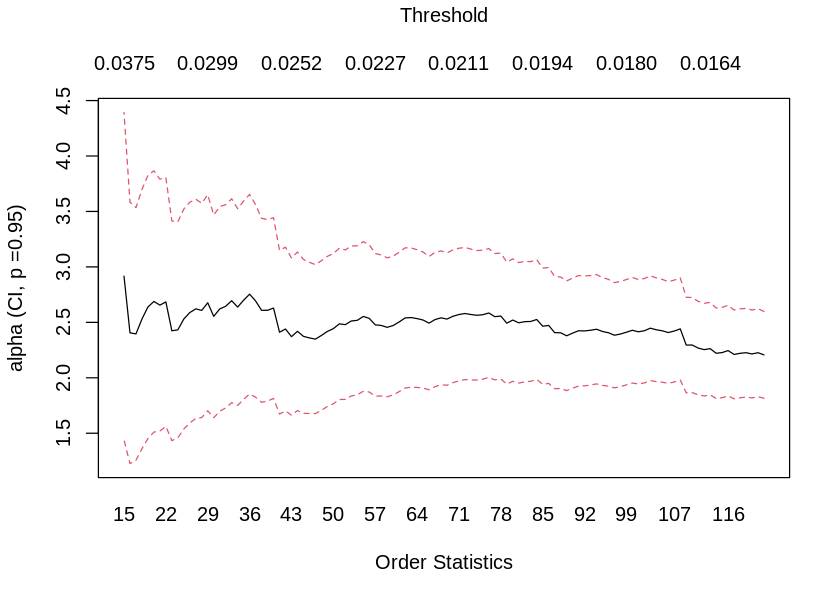

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
hill(dow.top)

In [ ]:
mean(danish>5.5)

[1] 0.1019843

Let us fit a GPD above such a threshold. If the fit is reliable, the tail parameter should be stable under higher thresholds.

Trying to fit a generalized Pareto:

In [ ]:
fit=gpd(danish,5.5)
tail(fit)

0.01419759,-0.04259004
-0.04259004,0.32083219


We get a xi = 0.6 which is significant because the se is 0.12. The beta of 4.3 is also significant.

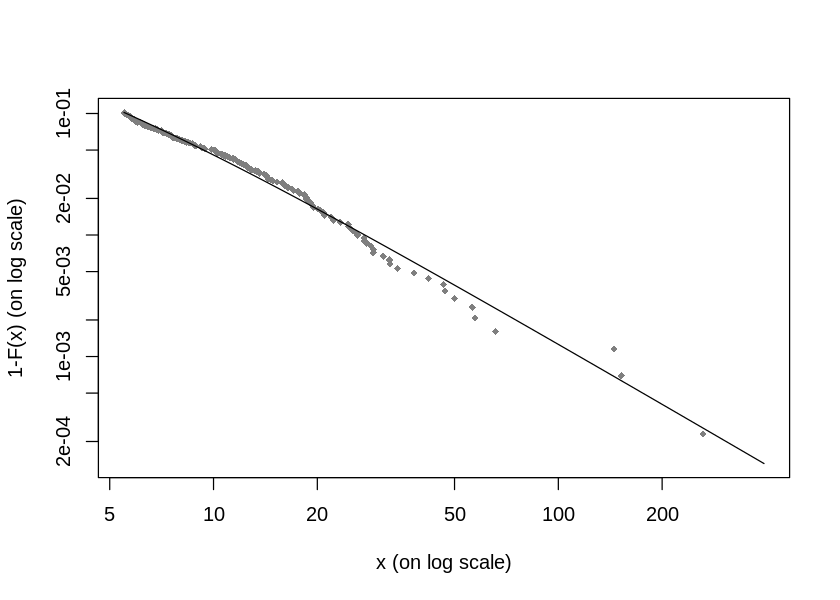

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
tailplot(fit, pch=18, cex=.8, col='gray50')

Note that plot(fit) does not work on Jupyter because it wants to launch an interactive menu, but it does when run in RStudio. Here is the output in this case:

<img src="https://user-images.githubusercontent.com/9312897/120120269-194b6e00-c16a-11eb-93c7-b3233a558975.png" width="500" height="500" />



The fitting is quite satisfactory.

Would a higher threshold change the value of xi?

In [ ]:
gpd(danish,20)$par.ests[1]
gpd(danish,20)$par.ses[1]

xi 
0.6840479

xi 
0.2749542

Qualitatively we would say no: a higher threshold preserves the xi.

A value of 0.6 or so seems plausible and in line with our previous findings.
Notice that it is confirmed that the second moment is not finite!

Given the GPD fit, we could be interested in estimating a very high quantile (VaR) and the corresponding ES. This approach is much more reliable than using empirical estimates, especially under fat tails.

We can rely on a useful function in the `evir` package. The function requires a GPD fit in its arguments.

Let us start from a 99% confidence level.

In [ ]:
riskmeasures(fit,0.99)

p,quantile,sfall
0.99,27.46474,71.70779


The empirical counterparts are

In [ ]:
quantile(danish,0.99) #99% Var
mean(danish[danish>=quantile(danish,0.99)]) #99% ES

99% 
26.04253

[1] 58.58575

While the VaR is comparable, the empirical ES seems to underestimate the tail risk.

Let us consider the so-called worst-case scenario, i.e. quantities at the 99.9% confidence level.

In [ ]:
riskmeasures(fit,0.999)

p,quantile,sfall
0.999,115.1248,292.3878


Notice that the empirical quantities, ignoring EVT, would make us underestimate the tail risk even more.

In [ ]:
quantile(danish,0.999) #99.9% Var
mean(danish[danish>=quantile(danish,0.999)]) #99.9% ES

99.9% 
131.5519

[1] 186.7737

Notice that in this case also the empirical VaR is less reliable.

And for 99.99? We are really zooming into the tail here. Empirically it is like we are considering less than 1 observation in the sample!

In [ ]:
riskmeasures(fit,0.9999)
quantile(danish,0.9999) #99.99% Var
mean(danish[danish>=quantile(danish,0.9999)]) #99.99% ES

p,quantile,sfall
0.9999,466.3411,1176.558


99.99% 
239.243

[1] 263.2504

Oops! EVT definitely wins.

Two useful functions I also suggest to check are `gpd.q` and `gpd.sfall`, which also provide confidence intervals. They need to be combined with `tailplot`.

For example

Lower CI  Estimate  Upper CI 
 44.65648  71.70779 244.01195

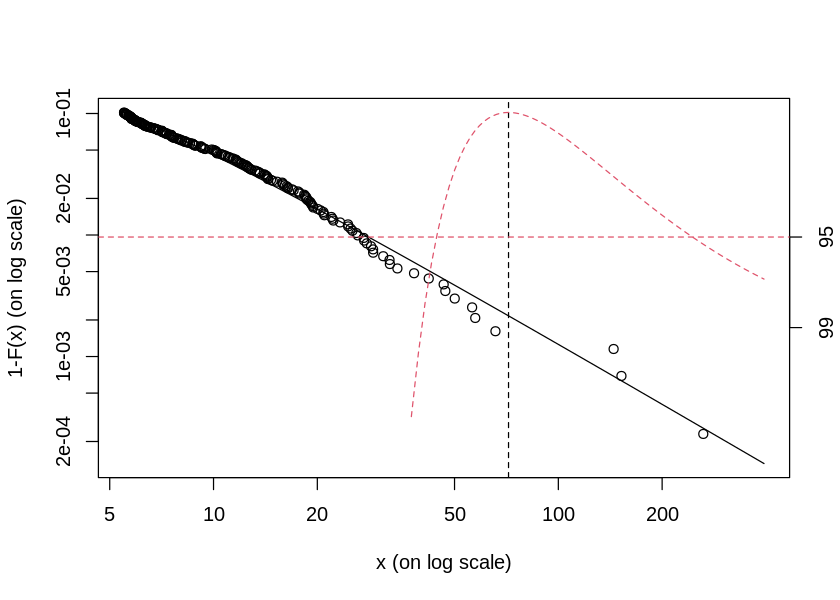

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
gpd.sfall(tailplot(fit), 0.99, ci.p = 0.95)

### EXAMPLE IN R OF EXTREME DATA:

From [this site](https://www.dataanalysisclassroom.com/lesson60/).

In [ ]:
install.packages('locfit')
install.packages('logspline')
library(locfit)
library(logspline)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

locfit 1.5-9.4 	 2020-03-24



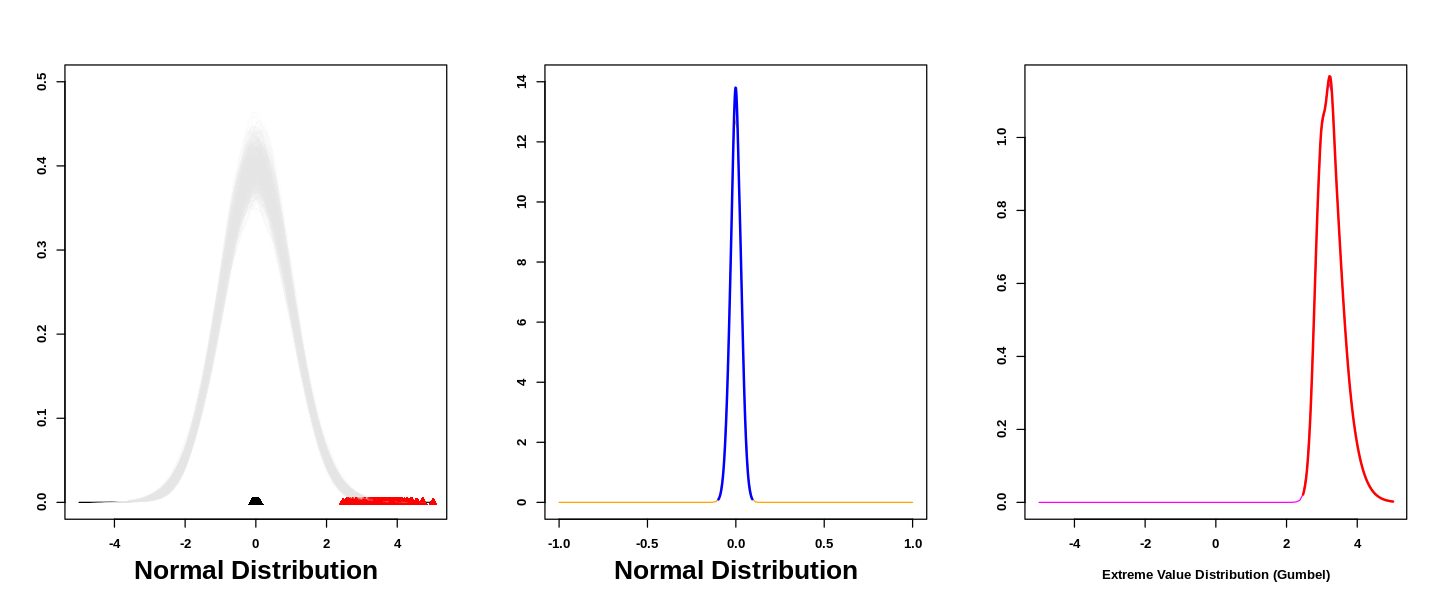

In [ ]:
# Normal Origins #
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,3))

x = rnorm(10000,0,1)
plot(logspline(x), xlim=c(-5,5), ylim=c(0,0.5), font=2, cex.lab=2, font.lab=2, xlab="Normal Distribution")

N = 1000
ave = matrix(NA,nrow=N,ncol=1)
max1 = matrix(NA,nrow=N,ncol=1)

for (i in 1:N)
{
 x = rnorm(N,0,1)
 
 lines(locfit(~x),col="grey90",lwd=0.1)
 points(mean(x),0,col="black",pch=17, cex=1.2)
 points(max(x),0,col="red",pch=17, cex=1.2)
 ave[i] = mean(x)
 max1[i] = max(x)
}


plot(locfit(~ave), xlim=c(-1,1), ylim=c(0,14),
        ylab="", cex.lab=2, font=2, font.lab=2, xlab="Normal Distribution", col='orange')
lines(locfit(~ave),lwd=2,col="blue")

plot(locfit(~max1),xlim=c(-5,5),
font=2,font.lab=2,ylab="",xlab="Extreme Value Distribution (Gumbel)", col='magenta')
lines(locfit(~max1),lwd=2,col="red")

Warning message in lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, :
“max_nr not converged”
Warning message in lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, :
“max_nr not converged”
Warning message in lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, :
“max_nr not converged”
Warning message in lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, :
“max_nr not converged”
Warning message in lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, :
“max_nr not converged”


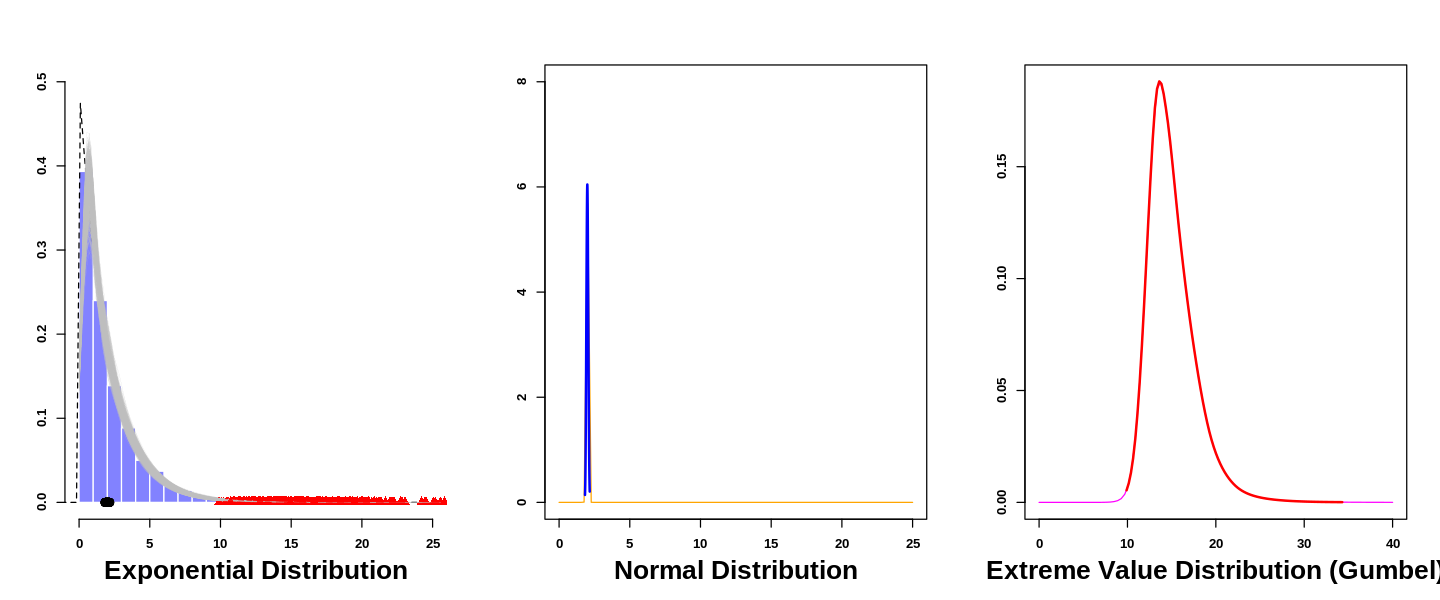

In [ ]:
# DOING THE SAME FOR DRAWS FROM THE EXPONENTIAL DISTRIBUTION:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,3))
x = rexp(10000,0.5)
hist(x, prob=T, xlim=c(0,25), ylim=c(0,0.5), ylab="", main="", font=2, border=F,
        col=rgb(0, 0, 255, max = 255, alpha = 125),
        cex.lab=2, font.lab=2, xlab="Exponential Distribution")

plot(logspline(x), add=T, lty=2)

N = 1000

ave = matrix(NA,nrow=N,ncol=1)
max1 = matrix(NA,nrow=N,ncol=1)

for (i in 1:N){
 x = rexp(N,0.5)
 
 lines(locfit(~x), col="grey75", lwd=0.1)
 points(mean(x),0, col="black", pch=19, cex=1.3)
 points(max(x),0, col="red", pch=17, cex=1.3)
 ave[i] = mean(x)
 max1[i] = max(x)
}


plot(locfit(~ave),xlim=c(0,25),ylim=c(0,8),ylab="",cex.lab=2,font=2,font.lab=2,xlab="Normal Distribution",col="orange")
lines(locfit(~ave),lwd=2,col="blue")
plot(locfit(~max1),xlim=c(0,40),font=2,font.lab=2,ylab="",xlab="Extreme Value Distribution (Gumbel)",cex.lab=2,col="magenta")
lines(locfit(~max1),lwd=2,col="red")

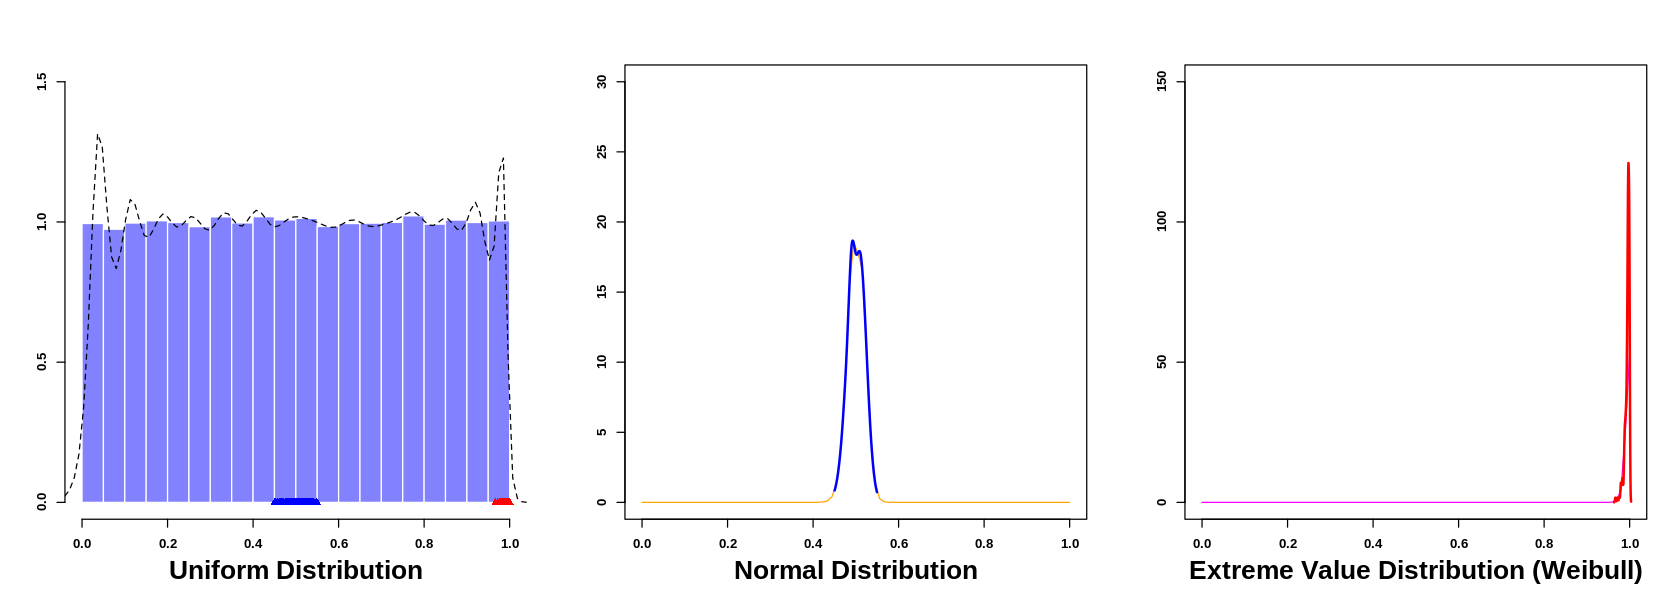

In [ ]:
# Uniform Origins #
options(repr.plot.width=14, repr.plot.height=5)
par(mfrow=c(1,3))

x = runif(100000,0,1)
hist(x, prob=T, xlim=c(0,1), ylim=c(0,1.5), ylab="", main="", font=2, border=F,
        col=rgb(0, 0, 255, max = 255, alpha = 125),
        cex.lab=2, font.lab=2, xlab="Uniform Distribution")
#hist(x,prob=T,xlim=c(0,1),ylab="",main="",font=2,cex.lab=2,font.lab=2,xlab="Uniform Distribution")


#plot(density(x),xlim=c(0,1),ylab="",main="",font=2,cex.lab=2,font.lab=2,xlab="Uniform Distribution")

plot(logspline(x), add=T, lty=2)
N = 200

ave = matrix(NA,nrow=N,ncol=1)
max1 = matrix(NA,nrow=N,ncol=1)

for (i in 1:N)
{
 x = runif(N,0,1)
 
 # lines(locfit(~x),col="grey")
 points(mean(x),0,col="blue",pch=17)
 points(max(x),0,col="red",pch=17)
 ave[i] = mean(x)
 max1[i] = max(x)
}


plot(locfit(~ave),xlim=c(0,1),ylim=c(0,30),ylab="",cex.lab=2,font=2,font.lab=2,
      xlab="Normal Distribution",col="orange")
lines(locfit(~ave),lwd=2,col="blue")


plot(locfit(~max1),xlim=c(0,1),ylim=c(0,150),font=2,font.lab=2,ylab="",
      xlab="Extreme Value Distribution (Weibull)",cex.lab=2,col="magenta")
lines(density(max1),lwd=2,col="red")

### THE THREE TYPES (GUMBEL, FRECHET, WEIBULL) AND THE GENERALIZED EXTREME VALUE DISTRIBUTION (GEV)
The three types of extreme value distributions have double exponential and single exponential forms. The maxima of independent random variables converge (in the limit when $n \to \infty$) to one of the three types, Gumbel $(e^{-e^{-y}})$, Frechet $(e^{-y^{-\gamma}})$ or Weibull $(e^{-(-y)^{\gamma}})$ depending on the parent distribution.

These three types can be combined into a single function called the generalized extreme value distribution (GEV) as in eq..$1$ above:

$$G(z) = e^{-[1+\xi(\frac{z-\mu}{\sigma})]^{-1/\xi}_{+}}$$

$\mu$ is the location parameter. $\sigma > 0$ is the scale parameter. $\xi$ controls the shape of the distribution (shape parameter).

When $\xi \to 0,$ GEV tends to a Gumbel distribution.

When $\xi > 0,$ GEV tends to the Frechet distribution.

When $\xi < 0,$ GEV tends to the Weibull distribution.

Its okay if you don’t know the origin distribution for an extreme dataset. GEV folds all the three types into one form, and the parameters $\mu, \sigma,$ and $\xi$ can be estimated from the data. The function has a closed form solution to compute the quantiles and probabilities.



Let’s examine the maximum cycles to fatigue data. We do not know which extreme value distribution it follows. If we fit a GEV and observe the shape parameter, we can say with certain confidence that the data follows Type I, Type II or Type III distribution.

Pay attention to the red highlighted text for now. It shows the results for the estimated parameters. The shape parameter is -0.52, i.e. $\xi < 0$. So, a Weibull distribution fits the data with high likelihood.

In [ ]:
install.packages('RCurl')
require('RCurl')
x=getURL('https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/cp_temperature.csv')
temperature_data <- read.csv(textConnection(x))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Loading required package: RCurl



In [ ]:
install.packages("extRemes")
library(extRemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppArmadillo’, ‘Lmoments’, ‘distillery’


Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following object is masked from ‘package:evir’:

    decluster


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot




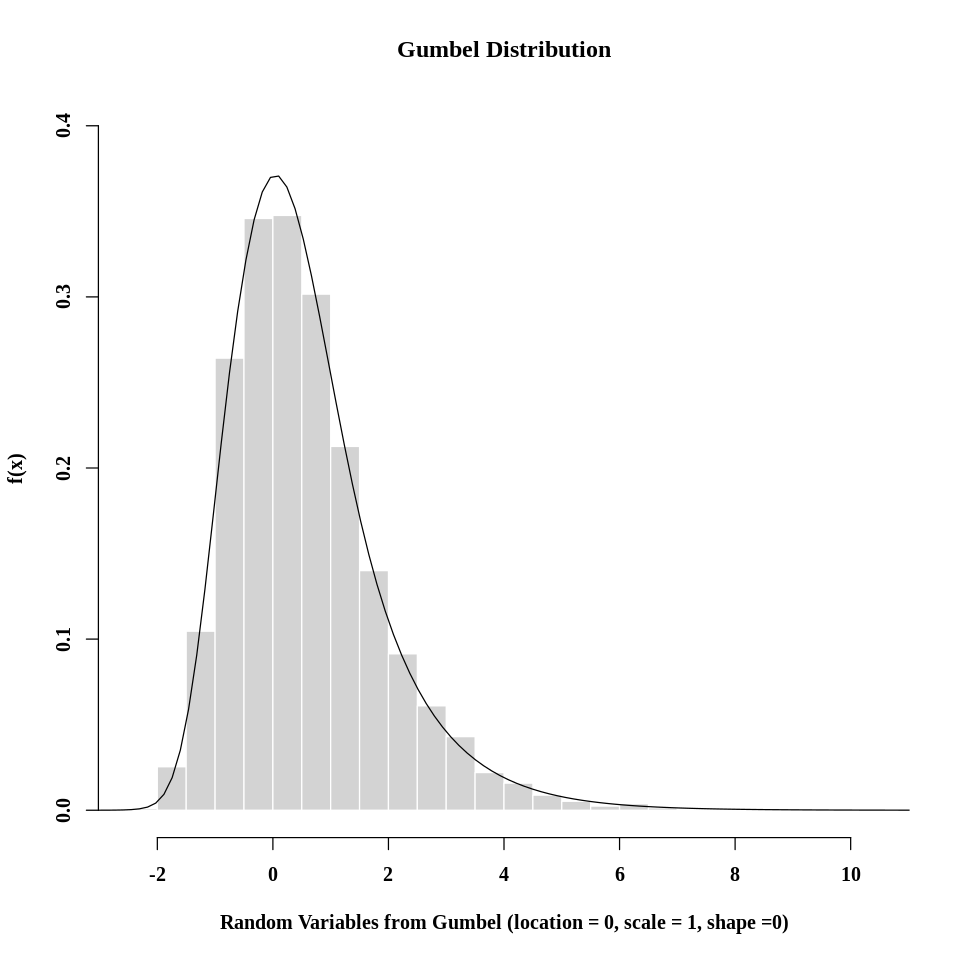

In [ ]:
# Generate Gumbel Random numbers
options(repr.plot.width=8, repr.plot.height=8)
x = revd(10000,loc=0,scale=1,shape=0)
hist(x,prob=T,xlab="Random Variables from Gumbel (location = 0, scale = 1, shape =0)", ylim=c(0,0.4), breaks=30,
  main="Gumbel Distribution",ylab="f(x)",font=2,family="serif",font.lab=2, border=F)
plot(logspline(x),add=T)

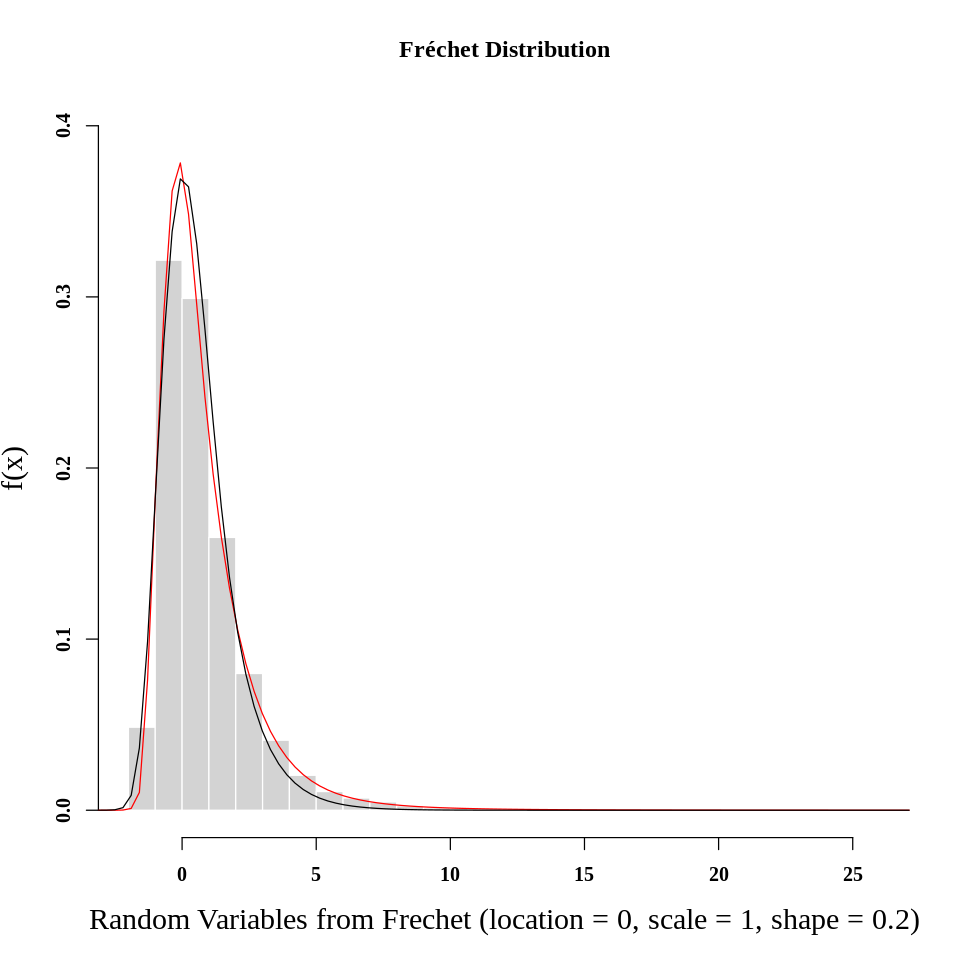

In [ ]:
# Frechet distribution plot
options(repr.plot.width=8, repr.plot.height=8)
y = revd(10000,loc=0,scale=1,shape=0.2)
hist(y,prob=T,ylim=c(0,0.4),xlab="Random Variables from Frechet (location = 0, scale = 1, shape = 0.2)", breaks=30,
  main="Fréchet Distribution",ylab="f(x)",font=2,family="serif", cex.lab=1.5, border=F)
plot(logspline(y),add=T,col="red")
plot(logspline(x),add=T)

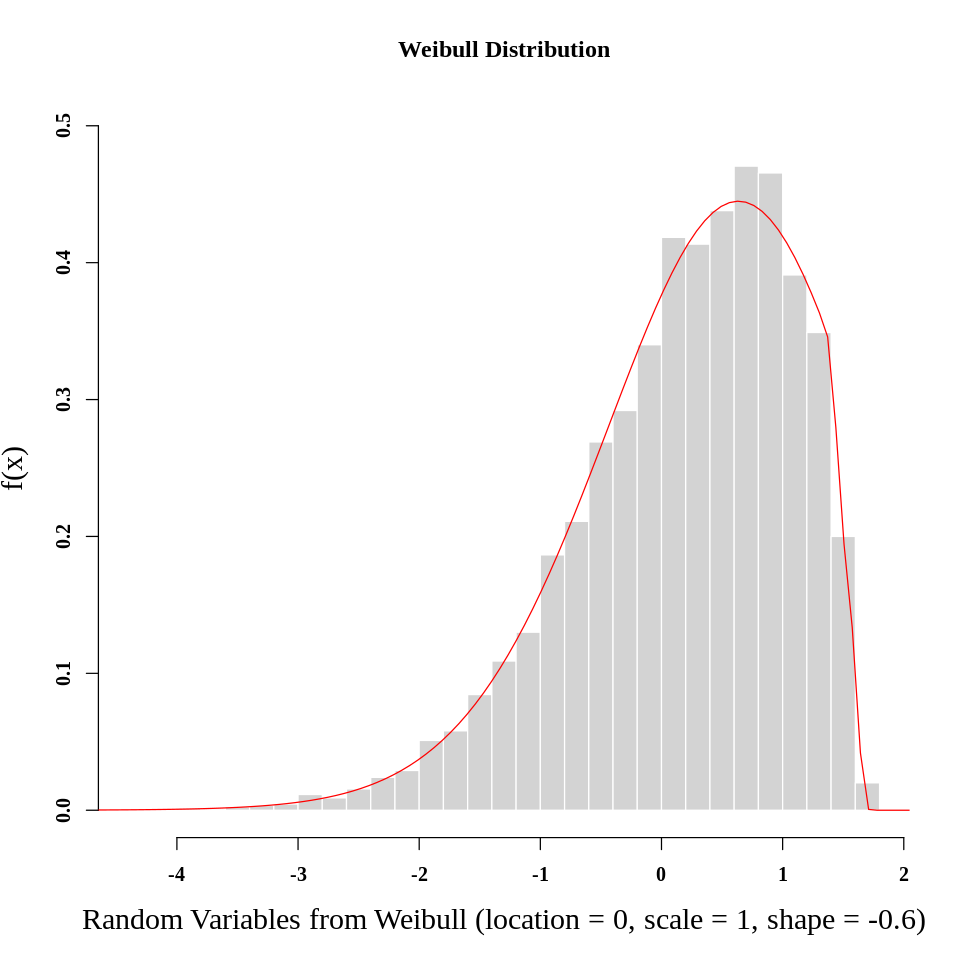

In [ ]:
## Weibull Distribution Plot 
options(repr.plot.width=8, repr.plot.height=8)
z = revd(10000,loc=0,scale=1,shape=-0.6)
hist(z,prob=T,ylim=c(0,0.5),xlab="Random Variables from Weibull (location = 0, scale = 1, shape = -0.6)", breaks=30,
  main="Weibull Distribution",ylab="f(x)",font=2,family="serif", cex.lab=1.5, border=F)
plot(logspline(z),add=T,col="red")

In [ ]:
fatigue <- c(726000,615000,508000,808000,755000,849000,384000,667000,515000,483000)
fatigue_cycles = as.matrix(fatigue)

fit = fevd(fatigue_cycles,type="GEV")
summary(fit)


fevd(x = fatigue_cycles, type = "GEV")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  132.8045 


 Estimated parameters:
     location         scale         shape 
 5.765016e+05  1.680629e+05 -5.231015e-01 

 Standard Error Estimates:
    location        scale        shape 
6.276363e+04 6.709826e+04 4.199849e-01 

 Estimated parameter covariance matrix.
              location         scale         shape
location  3.939273e+09 -527662537.18 -9.654182e+03
scale    -5.276625e+08 4502177071.08 -2.306339e+04
shape    -9.654182e+03     -23063.39  1.763873e-01

 AIC = 271.6089 

 BIC = 272.5167 


It shows the results for the estimated parameters. The shape parameter is -0.52 $(\xi < 0)$. So, a Weibull distribution fits the data with high likelihood.

Block Maxima

Let’s examine the temperature data. Assume we are interested in analyzing the data for maximum temperature each year. Remember we only care about the extremes. For this, we should first extract the annual maximum temperature values. This idea is called the block maxima. Each year is a block, and we get the maximum for each year.

![](https://user-images.githubusercontent.com/9312897/120946977-4d93d100-c70c-11eb-9901-081ae9b0b733.png)


[1] 67

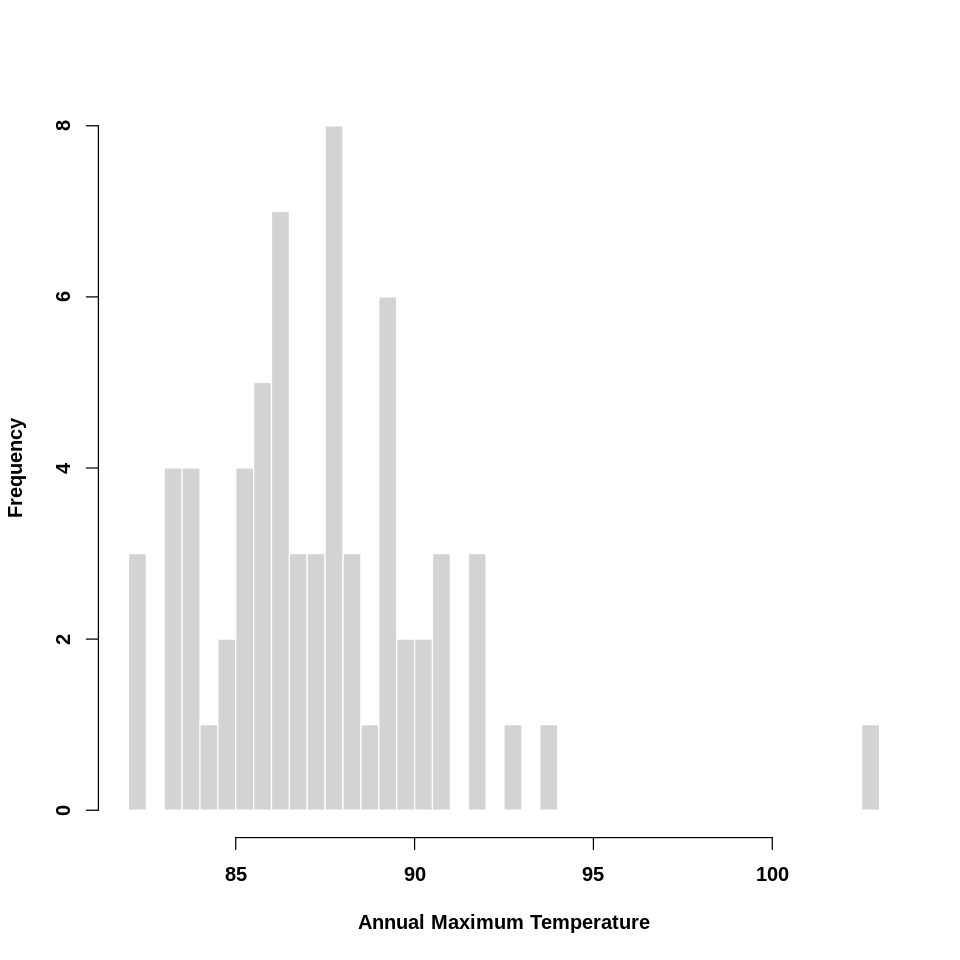

In [ ]:
# Annual Maximum Ave Temperature #
yr1 = 1951
yr2 = 2017
n = yr2 - yr1 + 1
n

annmax = matrix(NA,nrow=n,ncol=1)
for (i in 1:n)
{
 yr = 1950 + i
 index = which((temperature_data[,1] == yr))
 temperature_yr = temperature_data[index,4]
 annmax[i,1] = max(temperature_yr,na.rm=T)
}

options(repr.plot.width=8, repr.plot.height=8)
hist(annmax,xlab="Annual Maximum Temperature",font=2,main="",font.lab=2, breaks=45, border=F)

There is one value very different and far away from all other values. This phenomenon is the feature of the extreme values.


fevd(x = annmax, type = "GEV")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  169.1602 


 Estimated parameters:
   location       scale       shape 
86.14530247  2.64886498 -0.02706872 

 Standard Error Estimates:
 location     scale     shape 
0.3552756 0.2500867 0.0663774 

 Estimated parameter covariance matrix.
             location        scale        shape
location  0.126220730  0.028413268 -0.006875094
scale     0.028413268  0.062543342 -0.003859995
shape    -0.006875094 -0.003859995  0.004405960

 AIC = 344.3204 

 BIC = 350.9344 


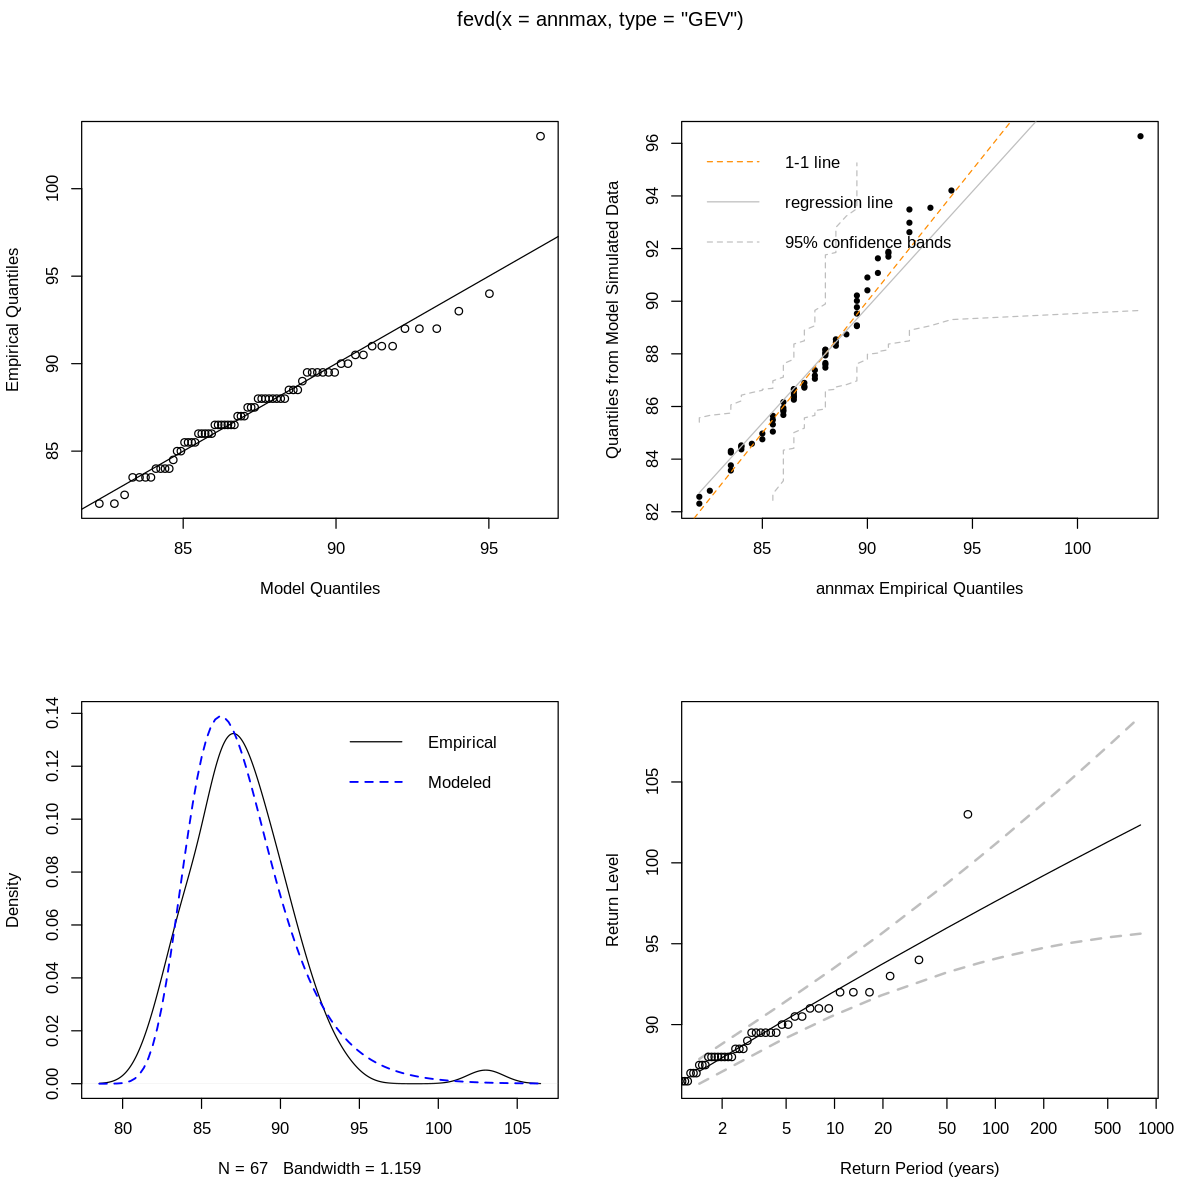

In [ ]:
fit_temperature = fevd(annmax,type="GEV")

options(repr.plot.width=10, repr.plot.height=10)

plot(fit_temperature)
summary(fit_temperature)

Focus on the bottom two images. The one in the bottom left is showing how well the GEV function (blue line) is matching the observed data (black line). Pretty reasonable.

What is the probability that the annual maximum temperature will be less than or equal to 92 degrees F?

Yes, you can compute this from the cumulative distribution function of the GEV distribution.

$$G(z) = P(Z \le z) = e^{-[1+\xi(\frac{z-\mu}{\sigma})]^{-1/\xi}_{+}}$$

Substitute $z = 92, \mu = 86.15, \sigma = 2.65, \xi = -0.03$ in the equation and you get $P(Z \le z) = 0.903.$ These values are the estimated location, scale and shape in the `fevd` above.

So, the probability that the annual maximum temperature will be less than or equal to 92 degrees F is 0.9.

Can I say, that the probability of exceeding 92 degrees F is 0.1? $P(Z > 92) = 0.1.$

A temperature of 92 degrees F is exceeded 10% of the times.

What do you know about exceedance probability and return period? If a random variable is exceeded with 10% probability, what is the frequency of its occurrence? 

$\text{Return Period T} = \frac{1}{P(\text{exceedance})}$

In equation form, Return Period of a quantile z is $T = \frac{1}{1 - G(z)}.$

So if 92 degrees is the temperature that exceeds 10% of the times, its return period is ten years.

On average, daily temperature as high as 92 degrees will occur once every ten years in New York City.

What temperature (z) occurs once in 50 years?

$$G(z) = 1 - \frac{1}{T}$$

$$e^{-[1+\xi(\frac{z-\mu}{\sigma})]^{-1/\xi}} = 1 - \frac{1}{T}$$

$$[1+\xi(\frac{z-\mu}{\sigma})]^{-1/\xi} = -\ln(1 - \frac{1}{T})$$

$$1+\xi(\frac{z-\mu}{\sigma}) = (-\ln(1 - \frac{1}{T}))^{-\xi}$$

$$z = \mu + \frac{\sigma}{\xi}\left(\left(-\ln\left(1 - \frac{1}{T}\right)\right)^{-\xi} - 1 \right)\tag 2$$

Now if you substitute $T = 50$ years and  $\mu = 86.15, \sigma = 2.65, \xi = -0.03,$ you get $z = 95.95.$

The 50 year return period temperature is 95.95 degrees F.




In [ ]:
mu    <-  fit_temperature$results$par[1]
sigma <-  fit_temperature$results$par[2]
xi    <-  fit_temperature$results$par[3]
Time  <-  50
mu + sigma/xi * ((-log(1 - 1/Time))^(-xi) - 1)

location 
 95.9539


This is what is being computed internally within the `extRemes` package to create the plot you see in the lower right hand corner. For quantile z, extRemes package has `qevd() ` function where you have to input probability p and other parameters. For probability $P(Z \le z),$ it is `pevd(),` and you have to input the quantile z and the other parameters.

We can get their relations from the plot.